# Machine Learning Metrics: Complete Beginner's Guide (All Parts)

**Learning Objectives:**
- Understand all major ML evaluation metrics and when to use them
- Master classification metrics: accuracy, precision, recall, F1-score, confusion matrix
- Master regression metrics: MAE, MSE, RMSE, R²
- Learn to interpret metrics in business context and choose the right ones
- Understand metric limitations and common pitfalls

**Prerequisites:** Basic Python, understanding of ML concepts (classification vs regression)

**Estimated Time:** ~90 minutes

---

## Why Metrics Matter

**The Problem:** You built a model that predicts customer behavior. It says "95% accuracy!" 
**The Question:** Is that actually good? What does it even mean?

**Real-world Impact:**
- **Medical diagnosis**: False negatives could miss cancer cases
- **Spam detection**: False positives could block important emails  
- **Sales prediction**: Wrong forecasts lead to inventory problems
- **Credit scoring**: Bad metrics = financial losses

**What You'll Learn:**
- How to evaluate if your model is actually working
- Which metrics to use for different business problems
- How to spot when metrics are misleading you
- How to communicate model performance to non-technical stakeholders

**🎯 Success Indicators:** By the end, you should be able to:
- Choose appropriate metrics for any ML problem
- Interpret confusion matrices and classification reports
- Explain model performance in business terms
- Identify when high accuracy might be misleading

**💡 Beginner Tips:**
- Don't rely on a single metric - use multiple perspectives
- Always consider the business context when choosing metrics
- Understand your data distribution before interpreting results
- Visualize metrics when possible - numbers alone can be misleading

In [1]:
# Essential imports for metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

# Classification metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, precision_recall_curve
)

# Regression metrics  
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, 
    r2_score, mean_absolute_percentage_error
)

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("📊 Metrics toolkit ready!")
print("🎯 Let's learn to evaluate ML models properly!")

📊 Metrics toolkit ready!
🎯 Let's learn to evaluate ML models properly!


---

## 📚 Reading Order Guide

**For Best Learning Experience, Read in This Order:**

1. **Part 0: Essential Evaluation Techniques** ⭐ (Start here! Learn HOW to evaluate)
2. **Part 1: Classification Metrics** (Learn what classification metrics mean)
3. **Part 2: Regression Metrics** (Learn what regression metrics mean)
4. **Part 3: Advanced Metrics** (ROC curves, PR curves, MAPE)
5. **More Important Metrics** (MCC, Log Loss, Cohen's Kappa, F-Beta, MedAE)
6. **Part 4: Choosing the Right Metrics** (How to select metrics for your problem)
7. **Part 5: Common Pitfalls** (What mistakes to avoid)

**Why This Order?** You need to understand HOW to evaluate properly (Part 0) before you can correctly interpret WHAT the metrics mean (Parts 1-3). Then learn MORE IMPORTANT METRICS that fill gaps in the standard toolkit. Finally, learn HOW TO CHOOSE metrics (Part 4) and WHAT TO AVOID (Part 5).

---

## Part 0: Essential Evaluation Techniques ⭐ READ THIS FIRST!

**Why This Comes First:** Before we can trust any metrics, we need to ensure we're evaluating models correctly. These foundational techniques affect the reliability of ALL metrics you'll learn. Understanding proper evaluation methodology is essential before interpreting any metric values.

**What We'll Cover:**
- Stratification: Why it matters for fair evaluation
- Cross-validation: Robust metric estimation
- Train/Validation/Test splits: Proper evaluation methodology
- Baseline comparisons: What does "good" actually mean?
- Threshold tuning: Optimizing decision boundaries
- Class weights: Handling imbalanced data
- Multi-class metrics: Macro, Micro, and Weighted averages

**💡 Key Insight:** If you don't evaluate properly, even perfect metrics won't help you!

### 0.1 Stratification: Ensuring Fair Evaluation

**What is Stratification?**
Stratification ensures that train and test sets have the same class distribution as the original dataset.

**Why It Matters:**
- **Without stratify**: Random split might put all spam emails in test set (or none!)
- **With stratify**: Both sets have ~10% spam, just like the original data
- **Impact on metrics**: Unstratified splits can give misleading metrics

**When to Use:**
- ✅ Classification problems (especially imbalanced)
- ✅ Multi-class problems
- ✅ Regression with categorical features (can stratify on bins)
- ❌ Not needed for perfectly balanced data (but still recommended)

**The Problem Without Stratify:**
Imagine splitting 1000 emails (100 spam, 900 not spam) randomly:
- Train set might get: 80 spam, 720 not spam (10% spam) ✅ Good!
- Test set might get: 20 spam, 180 not spam (10% spam) ✅ Good!
- **BUT** it could also get: 0 spam, 200 not spam (0% spam) ❌ Terrible!

**With Stratify:**
- Train set: Always ~80 spam, ~720 not spam (10% spam) ✅
- Test set: Always ~20 spam, ~180 not spam (10% spam) ✅
- **Guaranteed** same distribution!

In [2]:
# Demonstrate the importance of stratification
print("STRATIFICATION: Why It Matters for Fair Evaluation")
print("=" * 55)

# Create imbalanced dataset
X_demo, y_demo = make_classification(
    n_samples=1000,
    n_features=5,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% class 0, 10% class 1
    random_state=42
)

print(f"Original dataset: {len(y_demo)} samples")
print(f"Class 0: {(y_demo == 0).sum()} ({(y_demo == 0).mean():.1%})")
print(f"Class 1: {(y_demo == 1).sum()} ({(y_demo == 1).mean():.1%})")

# Split WITHOUT stratify (multiple times to show variability)
print("\n" + "="*55)
print("WITHOUT STRATIFY (Random Split - Run Multiple Times):")
print("="*55)

for i in range(3):
    X_train_no_strat, X_test_no_strat, y_train_no_strat, y_test_no_strat = train_test_split(
        X_demo, y_demo, test_size=0.2, random_state=i  # Different seed each time
    )
    
    train_dist = (y_train_no_strat == 1).mean()
    test_dist = (y_test_no_strat == 1).mean()
    
    print(f"\nSplit {i+1} (random_state={i}):")
    print(f"  Train set: {(y_train_no_strat == 1).sum()}/{len(y_train_no_strat)} spam ({train_dist:.1%})")
    print(f"  Test set:  {(y_test_no_strat == 1).sum()}/{len(y_test_no_strat)} spam ({test_dist:.1%})")
    
    if abs(train_dist - 0.1) > 0.02 or abs(test_dist - 0.1) > 0.02:
        print(f"  ⚠️  Distribution mismatch! Metrics will be unreliable!")

# Split WITH stratify
print("\n" + "="*55)
print("WITH STRATIFY (Guaranteed Same Distribution):")
print("="*55)

X_train_strat, X_test_strat, y_train_strat, y_test_strat = train_test_split(
    X_demo, y_demo, test_size=0.2, random_state=42, stratify=y_demo
)

train_dist = (y_train_strat == 1).mean()
test_dist = (y_test_strat == 1).mean()

print(f"\nTrain set: {(y_train_strat == 1).sum()}/{len(y_train_strat)} spam ({train_dist:.1%})")
print(f"Test set:  {(y_test_strat == 1).sum()}/{len(y_test_strat)} spam ({test_dist:.1%})")
print(f"✅ Perfect match! Both sets have {(y_demo == 1).mean():.1%} spam")

# Show impact on metrics
print("\n" + "="*55)
print("IMPACT ON METRICS:")
print("="*55)

# Train a simple model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

# Without stratify (worst case scenario)
model.fit(X_train_no_strat, y_train_no_strat)
pred_no_strat = model.predict(X_test_no_strat)
acc_no_strat = accuracy_score(y_test_no_strat, pred_no_strat)
recall_no_strat = recall_score(y_test_no_strat, pred_no_strat, zero_division=0)

# With stratify
model.fit(X_train_strat, y_train_strat)
pred_strat = model.predict(X_test_strat)
acc_strat = accuracy_score(y_test_strat, pred_strat)
recall_strat = recall_score(y_test_strat, pred_strat, zero_division=0)

print(f"\nWithout stratify:")
print(f"  Accuracy: {acc_no_strat:.3f}")
print(f"  Recall:   {recall_no_strat:.3f}")

print(f"\nWith stratify:")
print(f"  Accuracy: {acc_strat:.3f}")
print(f"  Recall:   {recall_strat:.3f}")

print("\n💡 KEY INSIGHT:")
print("• Stratify ensures your test set represents the real-world distribution")
print("• Without it, metrics can be misleading (especially on imbalanced data)")
print("• Always use stratify=y in train_test_split for classification!")
print("• Exception: Only skip if data is perfectly balanced AND you're certain")

STRATIFICATION: Why It Matters for Fair Evaluation
Original dataset: 1000 samples
Class 0: 895 (89.5%)
Class 1: 105 (10.5%)

WITHOUT STRATIFY (Random Split - Run Multiple Times):

Split 1 (random_state=0):
  Train set: 84/800 spam (10.5%)
  Test set:  21/200 spam (10.5%)

Split 2 (random_state=1):
  Train set: 86/800 spam (10.8%)
  Test set:  19/200 spam (9.5%)

Split 3 (random_state=2):
  Train set: 85/800 spam (10.6%)
  Test set:  20/200 spam (10.0%)

WITH STRATIFY (Guaranteed Same Distribution):

Train set: 84/800 spam (10.5%)
Test set:  21/200 spam (10.5%)
✅ Perfect match! Both sets have 10.5% spam

IMPACT ON METRICS:

Without stratify:
  Accuracy: 0.930
  Recall:   0.500

With stratify:
  Accuracy: 0.950
  Recall:   0.524

💡 KEY INSIGHT:
• Stratify ensures your test set represents the real-world distribution
• Without it, metrics can be misleading (especially on imbalanced data)
• Always use stratify=y in train_test_split for classification!
• Exception: Only skip if data is perfe

### 0.2 Cross-Validation: Robust Metric Estimation

**What is Cross-Validation?**
Instead of a single train/test split, cross-validation splits data into multiple folds and evaluates on each fold.

**Types of Cross-Validation:**
- **K-Fold CV**: Split data into K folds, train on K-1, test on 1, repeat K times
- **Stratified K-Fold**: K-Fold but maintains class distribution in each fold
- **Leave-One-Out**: Each sample is its own test set (computationally expensive)

**Why Use Cross-Validation?**
- **Single split problem**: Metrics depend on which samples end up in test set
- **CV solution**: Get average metrics across multiple splits (more reliable)
- **Variance reduction**: Reduces impact of lucky/unlucky splits
- **Better model selection**: More robust comparison between models

**When to Use:**
- ✅ Small datasets (every sample matters)
- ✅ Model comparison (more reliable than single split)
- ✅ Hyperparameter tuning (more robust evaluation)
- ❌ Very large datasets (single split is usually fine)
- ❌ Time-series data (use time-based splits instead)

**Common K Values:**
- **K=5**: Good balance (5 folds, 80/20 split each time)
- **K=10**: More robust but slower (10 folds, 90/10 split each time)
- **K=3**: Faster but less robust (only 3 evaluations)

CROSS-VALIDATION: Robust Metric Estimation
Dataset: 500 samples, 20.4% positive class

Single Split Evaluation:
  F1-Score: 0.833
  ⚠️  This depends on which samples were in test set!

5-Fold Cross-Validation:
  F1-Scores per fold: [0.895 0.829 0.923 0.9   0.95 ]
  Mean F1-Score: 0.899
  Std F1-Score:  0.040
  Range: [0.829, 0.950]


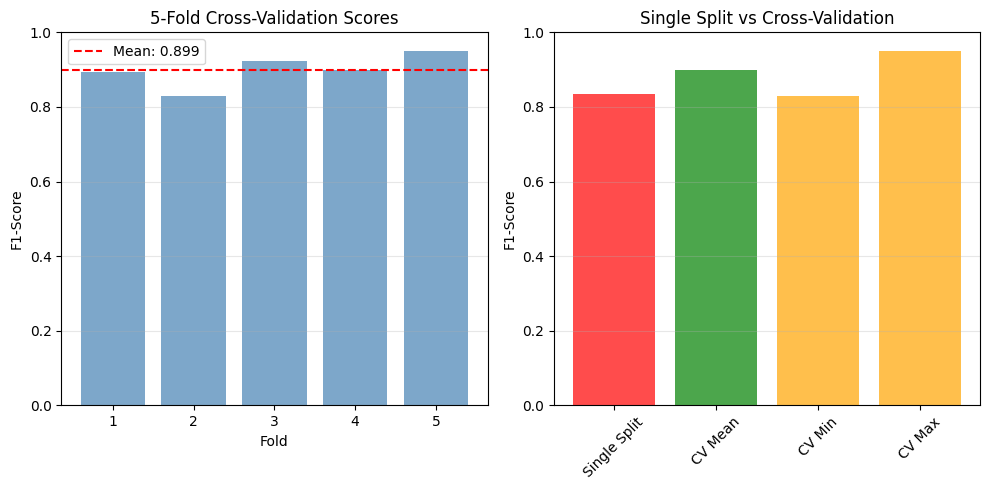


Stratified 5-Fold Cross-Validation:
(Ensures each fold has same class distribution)
  F1-Scores per fold: [0.8   0.884 0.95  0.865 0.952]
  Mean F1-Score: 0.890
  Std F1-Score:  0.057

💡 CROSS-VALIDATION INSIGHTS:
• CV gives you multiple evaluations (more reliable)
• Mean CV score is better estimate than single split
• Std CV score shows how stable your model is
• Use StratifiedKFold for imbalanced data
• CV is slower but worth it for small datasets or model comparison


In [3]:
# Demonstrate cross-validation
print("CROSS-VALIDATION: Robust Metric Estimation")
print("=" * 45)

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Create a simple dataset for demonstration
X_cv, y_cv = make_classification(
    n_samples=500,
    n_features=5,
    n_classes=2,
    weights=[0.8, 0.2],
    random_state=42
)

print(f"Dataset: {len(X_cv)} samples, {(y_cv == 1).mean():.1%} positive class")

# Single train/test split
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X_cv, y_cv, test_size=0.2, random_state=42, stratify=y_cv
)

model_single = RandomForestClassifier(n_estimators=50, random_state=42)
model_single.fit(X_train_single, y_train_single)
single_score = f1_score(y_test_single, model_single.predict(X_test_single))

print(f"\nSingle Split Evaluation:")
print(f"  F1-Score: {single_score:.3f}")
print(f"  ⚠️  This depends on which samples were in test set!")

# 5-Fold Cross-Validation
print(f"\n5-Fold Cross-Validation:")
cv_scores = cross_val_score(
    RandomForestClassifier(n_estimators=50, random_state=42),
    X_cv, y_cv,
    cv=5,  # 5 folds
    scoring='f1',  # Use F1-score
    n_jobs=-1  # Use all CPU cores
)

print(f"  F1-Scores per fold: {cv_scores.round(3)}")
print(f"  Mean F1-Score: {cv_scores.mean():.3f}")
print(f"  Std F1-Score:  {cv_scores.std():.3f}")
print(f"  Range: [{cv_scores.min():.3f}, {cv_scores.max():.3f}]")

# Visualize CV results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores, alpha=0.7, color='steelblue')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
plt.xlabel('Fold')
plt.ylabel('F1-Score')
plt.title('5-Fold Cross-Validation Scores')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim([0, 1])

# Compare single split vs CV
plt.subplot(1, 2, 2)
comparison = ['Single Split', 'CV Mean', 'CV Min', 'CV Max']
scores = [single_score, cv_scores.mean(), cv_scores.min(), cv_scores.max()]
colors = ['red', 'green', 'orange', 'orange']
plt.bar(comparison, scores, alpha=0.7, color=colors)
plt.ylabel('F1-Score')
plt.title('Single Split vs Cross-Validation')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

# Stratified K-Fold (important for imbalanced data)
print(f"\nStratified 5-Fold Cross-Validation:")
print("(Ensures each fold has same class distribution)")

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_strat = cross_val_score(
    RandomForestClassifier(n_estimators=50, random_state=42),
    X_cv, y_cv,
    cv=skf,
    scoring='f1',
    n_jobs=-1
)

print(f"  F1-Scores per fold: {cv_scores_strat.round(3)}")
print(f"  Mean F1-Score: {cv_scores_strat.mean():.3f}")
print(f"  Std F1-Score:  {cv_scores_strat.std():.3f}")

print("\n💡 CROSS-VALIDATION INSIGHTS:")
print("• CV gives you multiple evaluations (more reliable)")
print("• Mean CV score is better estimate than single split")
print("• Std CV score shows how stable your model is")
print("• Use StratifiedKFold for imbalanced data")
print("• CV is slower but worth it for small datasets or model comparison")

### 0.3 Train/Validation/Test Splits: Proper Evaluation Methodology

**The Three Sets:**
1. **Training Set**: Used to train the model
2. **Validation Set**: Used to tune hyperparameters and select models
3. **Test Set**: Used ONLY for final evaluation (locked away until the end!)

**Why Three Sets?**
- **Problem**: If you tune hyperparameters on test set, you're "cheating"
- **Solution**: Use validation set for tuning, test set only for final check
- **Result**: Test set gives unbiased estimate of real-world performance

**Common Split Ratios:**
- **Small dataset (<10K samples)**: 60/20/20 (train/val/test)
- **Medium dataset (10K-100K)**: 70/15/15
- **Large dataset (>100K)**: 80/10/10 or even 90/5/5

**The Golden Rule:**
🔒 **Test set is LOCKED AWAY until final evaluation!**
- Don't use it for model selection
- Don't use it for hyperparameter tuning
- Don't look at it until you're done developing
- Use it ONCE for final performance report

**What Happens Without Proper Splits:**
- Overfitting to test set (model "memorizes" test data)
- Overly optimistic metrics (doesn't generalize)
- Can't trust your results in production

### 0.4 Baseline Comparisons: What Does "Good" Actually Mean?

**The Problem:** A model with 70% accuracy sounds okay... but is it?
- If 90% of emails are not spam, a model that always says "not spam" gets 90% accuracy!
- **Baseline comparison** tells you if your model is actually learning

**Types of Baselines:**
1. **Random Baseline**: Random predictions (50% accuracy for binary, 1/n for n classes)
2. **Majority Class Baseline**: Always predict most common class
3. **Simple Rule Baseline**: Use a simple heuristic (e.g., "if word_count > 100, then spam")
4. **Previous Model Baseline**: Compare to existing solution

**Why Baselines Matter:**
- **Context**: 70% accuracy might be great (if baseline is 50%) or terrible (if baseline is 90%)
- **Reality Check**: If you can't beat a simple rule, your ML model isn't adding value
- **Stakeholder Communication**: "We beat the baseline by 15%" is more meaningful than "70% accuracy"

**Red Flags:**
- ❌ Model performs worse than majority class baseline
- ❌ Model performs only slightly better than random
- ❌ Model can't beat a simple rule-based approach

### 0.5 Threshold Tuning: Optimizing Decision Boundaries

**The Problem:** Most classifiers output probabilities, not binary predictions. Where do you draw the line?

**Default Threshold:** Usually 0.5 (predict positive if probability > 0.5)
- **But**: This might not be optimal for your business problem!
- **Example**: In spam detection, maybe you want threshold = 0.3 (catch more spam) or 0.7 (fewer false positives)

**Why Threshold Matters:**
- **Lower threshold**: More positive predictions → Higher recall, Lower precision
- **Higher threshold**: Fewer positive predictions → Lower recall, Higher precision
- **Business impact**: Different thresholds optimize for different business goals

**How to Choose Threshold:**
1. **Precision-Recall Curve**: Find threshold that balances precision and recall
2. **ROC Curve**: Find threshold that balances TPR and FPR
3. **Business Cost**: Calculate cost at different thresholds, pick minimum cost
4. **F1-Score**: Find threshold that maximizes F1-score

**Common Approaches:**
- **Maximize F1**: Good when precision and recall are equally important
- **Target Recall**: Set threshold to achieve specific recall (e.g., catch 90% of spam)
- **Target Precision**: Set threshold to achieve specific precision (e.g., 95% of spam predictions are correct)
- **Minimize Cost**: If you know costs of FP and FN, optimize for minimum cost

### 0.6 Class Weights: Handling Imbalanced Data

**The Problem:** When classes are imbalanced, models tend to ignore the minority class
- **Example**: 90% not spam, 10% spam → Model learns to always predict "not spam"

**Solution: Class Weights**
- Tell the model that minority class mistakes are more costly
- Forces model to pay more attention to minority class
- Common in scikit-learn: `class_weight='balanced'` or `class_weight={0: 1, 1: 10}`

**How Class Weights Work:**
- **Without weights**: All mistakes cost the same
- **With weights**: Minority class mistakes cost more (penalty is higher)
- **Result**: Model tries harder to correctly classify minority class

**Common Approaches:**
1. **'balanced'**: Automatically weights inversely proportional to class frequency
2. **Manual weights**: Specify exact weights (e.g., {0: 1, 1: 5})
3. **'balanced_subsample'**: For tree-based models, balances each bootstrap sample

**When to Use:**
- ✅ Imbalanced datasets (especially when minority class is important)
- ✅ When you want to improve recall for minority class
- ❌ Balanced datasets (unnecessary)
- ❌ When precision for minority class is more important than recall

### 0.7 Multi-Class Metrics: Macro, Micro, and Weighted Averages

**The Problem:** With 3+ classes, how do you average precision/recall/F1 across classes?

**Three Averaging Methods:**
1. **Macro Average**: Simple average across all classes (treats all classes equally)
2. **Micro Average**: Aggregate all TP/FP/FN, then calculate metric (treats all samples equally)
3. **Weighted Average**: Macro average weighted by class frequency (accounts for imbalance)

**When to Use Which:**
- **Macro**: All classes are equally important (e.g., medical diagnosis of rare diseases)
- **Micro**: Overall performance matters more than per-class (e.g., document classification)
- **Weighted**: Imbalanced data, but want to account for class sizes (most common choice)

**Key Insight:**
- **Macro**: "How well does the model perform on average across classes?"
- **Micro**: "How well does the model perform overall?"
- **Weighted**: "How well does the model perform, accounting for class imbalance?"

## Part 1: Classification Metrics

Classification is about predicting categories. Let's start with a realistic business scenario.

**Business Scenario:** Email Spam Detection
- **Goal**: Classify emails as spam (1) or not spam (0)
- **Challenge**: Different types of mistakes have different costs
- **Key Question**: What happens when we're wrong?

**Types of Mistakes:**
- **False Positive**: Marking good email as spam (user misses important email)
- **False Negative**: Letting spam through (user gets annoyed)

Which mistake is worse? It depends on your business priorities!

In [4]:
# Create realistic email classification dataset
print("Creating Email Spam Detection Dataset")
print("=" * 40)

# Generate synthetic email data
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% not spam, 10% spam (realistic imbalance)
    random_state=42
)

# Create feature names
feature_names = [
    'word_count', 'exclamation_marks', 'capital_letters', 'suspicious_words',
    'sender_reputation', 'has_attachments', 'external_links', 'time_sent',
    'previous_interactions', 'domain_age'
]

# Create DataFrame for better understanding
df_email = pd.DataFrame(X, columns=feature_names)
df_email['is_spam'] = y

print(f"Dataset created: {len(df_email)} emails")
print(f"Class distribution:")
print(f"  Not Spam (0): {(y == 0).sum()} emails ({(y == 0).mean():.1%})")
print(f"  Spam (1): {(y == 1).sum()} emails ({(y == 1).mean():.1%})")

print("\n🚨 NOTICE: This is an imbalanced dataset!")
print("Only 10% of emails are spam - this will affect our metrics.")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain set: {len(X_train)} emails")
print(f"Test set: {len(X_test)} emails")

Creating Email Spam Detection Dataset
Dataset created: 1000 emails
Class distribution:
  Not Spam (0): 897 emails (89.7%)
  Spam (1): 103 emails (10.3%)

🚨 NOTICE: This is an imbalanced dataset!
Only 10% of emails are spam - this will affect our metrics.

Train set: 800 emails
Test set: 200 emails


In [5]:
# Train different models to compare metrics
print("Training Multiple Models for Comparison")
print("=" * 40)

# Model 1: Conservative model (high precision, low recall)
conservative_model = LogisticRegression(C=0.1, random_state=42)
conservative_model.fit(X_train, y_train)
conservative_pred = conservative_model.predict(X_test)

# Model 2: Aggressive model (low precision, high recall)
aggressive_model = LogisticRegression(C=10, class_weight='balanced', random_state=42)
aggressive_model.fit(X_train, y_train)
aggressive_pred = aggressive_model.predict(X_test)

# Model 3: Balanced model
balanced_model = RandomForestClassifier(n_estimators=100, random_state=42)
balanced_model.fit(X_train, y_train)
balanced_pred = balanced_model.predict(X_test)

print("✅ Three models trained:")
print("  1. Conservative: Careful about marking emails as spam")
print("  2. Aggressive: Quick to mark emails as spam")
print("  3. Balanced: Tries to balance both concerns")
print("\nNow let's see how different metrics tell different stories...")

Training Multiple Models for Comparison
✅ Three models trained:
  1. Conservative: Careful about marking emails as spam
  2. Aggressive: Quick to mark emails as spam
  3. Balanced: Tries to balance both concerns

Now let's see how different metrics tell different stories...


### 1.1 Accuracy: The Most Misunderstood Metric

**What it is:** Percentage of correct predictions
**Formula:** (Correct Predictions) / (Total Predictions)
**Range:** 0 to 1 (or 0% to 100%)

**When it's useful:**
- Balanced datasets (roughly equal classes)
- When all mistakes have equal cost

**When it's misleading:**
- Imbalanced datasets (like our spam example)
- When different mistakes have different costs

**The Accuracy Paradox:** A model that never predicts spam (always says "not spam") would get 90% accuracy on our dataset!

In [6]:
# Calculate accuracy for all models
print("ACCURACY COMPARISON")
print("=" * 20)

models = [
    ("Conservative", conservative_pred),
    ("Aggressive", aggressive_pred),
    ("Balanced", balanced_pred)
]

for name, predictions in models:
    acc = accuracy_score(y_test, predictions)
    print(f"{name:12}: {acc:.3f} ({acc:.1%})")

# The "always predict not spam" baseline
always_not_spam = np.zeros_like(y_test)  # Always predict 0 (not spam)
baseline_acc = accuracy_score(y_test, always_not_spam)
print(f"{'Baseline':12}: {baseline_acc:.3f} ({baseline_acc:.1%}) ← Always says 'not spam'")

print("\n🚨 THE ACCURACY TRAP:")
print(f"A 'dumb' model that never catches spam gets {baseline_acc:.1%} accuracy!")
print("This is why accuracy alone is dangerous for imbalanced data.")
print("\n💡 KEY INSIGHT: High accuracy ≠ Good model")
print("We need metrics that tell us about different types of mistakes.")

ACCURACY COMPARISON
Conservative: 0.890 (89.0%)
Aggressive  : 0.740 (74.0%)
Balanced    : 0.915 (91.5%)
Baseline    : 0.895 (89.5%) ← Always says 'not spam'

🚨 THE ACCURACY TRAP:
A 'dumb' model that never catches spam gets 89.5% accuracy!
This is why accuracy alone is dangerous for imbalanced data.

💡 KEY INSIGHT: High accuracy ≠ Good model
We need metrics that tell us about different types of mistakes.


### 1.2 Confusion Matrix: The Foundation of Understanding

**What it is:** A table showing actual vs predicted classes
**Why it matters:** Shows exactly where your model makes mistakes

**The 2x2 Matrix for Binary Classification:**
```
                    PREDICTED
                Not Spam    Spam
ACTUAL Not Spam    TN       FP
       Spam        FN       TP
```

**Key Terms:**
- **True Positive (TP)**: Correctly identified spam
- **True Negative (TN)**: Correctly identified not spam  
- **False Positive (FP)**: Wrongly marked as spam (Type I error)
- **False Negative (FN)**: Missed spam (Type II error)

**Business Translation:**
- **FP**: Good email goes to spam folder (user misses important email)
- **FN**: Spam email reaches inbox (user gets annoyed)

CONFUSION MATRICES: Where Models Make Mistakes


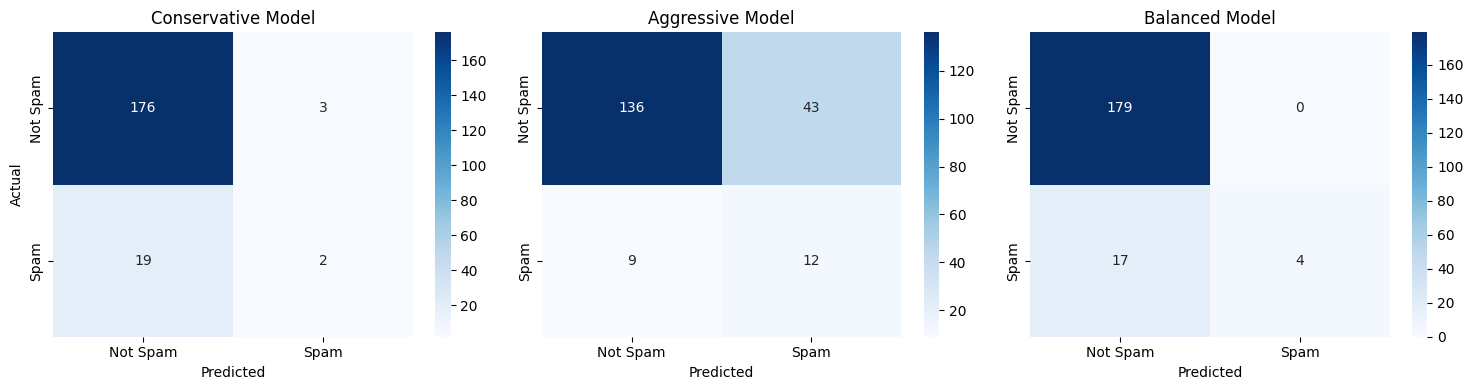


DETAILED BREAKDOWN:

Conservative Model:
  True Negatives (TN):  176 - Correctly identified not spam
  False Positives (FP):   3 - Good emails marked as spam 😞
  False Negatives (FN):  19 - Spam emails that got through 😠
  True Positives (TP):    2 - Correctly caught spam
  → 3 users will miss important emails
  → 19 spam emails will annoy users

Aggressive Model:
  True Negatives (TN):  136 - Correctly identified not spam
  False Positives (FP):  43 - Good emails marked as spam 😞
  False Negatives (FN):   9 - Spam emails that got through 😠
  True Positives (TP):   12 - Correctly caught spam
  → 43 users will miss important emails
  → 9 spam emails will annoy users

Balanced Model:
  True Negatives (TN):  179 - Correctly identified not spam
  False Positives (FP):   0 - Good emails marked as spam 😞
  False Negatives (FN):  17 - Spam emails that got through 😠
  True Positives (TP):    4 - Correctly caught spam
  → 0 users will miss important emails
  → 17 spam emails will annoy users


In [7]:
# Create and visualize confusion matrices
print("CONFUSION MATRICES: Where Models Make Mistakes")
print("=" * 50)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (name, predictions) in enumerate(models):
    cm = confusion_matrix(y_test, predictions)
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Spam', 'Spam'],
                yticklabels=['Not Spam', 'Spam'],
                ax=axes[idx])
    axes[idx].set_title(f'{name} Model')
    axes[idx].set_xlabel('Predicted')
    if idx == 0:
        axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Detailed breakdown
print("\nDETAILED BREAKDOWN:")
for name, predictions in models:
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name} Model:")
    print(f"  True Negatives (TN):  {tn:3d} - Correctly identified not spam")
    print(f"  False Positives (FP): {fp:3d} - Good emails marked as spam 😞")
    print(f"  False Negatives (FN): {fn:3d} - Spam emails that got through 😠")
    print(f"  True Positives (TP):  {tp:3d} - Correctly caught spam")
    
    print(f"  → {fp} users will miss important emails")
    print(f"  → {fn} spam emails will annoy users")

### 1.3 Precision: "When I predict positive, how often am I right?"

**What it is:** Of all positive predictions, how many were actually positive?
**Formula:** TP / (TP + FP)
**Range:** 0 to 1 (or 0% to 100%)

**Business Translation (Spam Detection):**
"Of all emails I marked as spam, how many were actually spam?"

**When to prioritize high precision:**
- Cost of false positives is high
- You want to be very sure when you predict positive
- Examples: Medical diagnosis, spam detection, fraud detection

**Real-world Impact:**
- **High precision**: Few good emails go to spam (users happy)
- **Low precision**: Many good emails marked as spam (users frustrated)

In [8]:
# Calculate and explain precision
print("PRECISION: 'When I say spam, how often am I right?'")
print("=" * 55)

for name, predictions in models:
    precision = precision_score(y_test, predictions, zero_division=0)
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name} Model:")
    print(f"  Precision: {precision:.3f} ({precision:.1%})")
    print(f"  Calculation: {tp} / ({tp} + {fp}) = {tp}/{tp + fp} = {precision:.3f}")
    
    if precision > 0:
        print(f"  📧 Business meaning: Of {tp + fp} emails marked as spam, {tp} were actually spam")
        print(f"  😞 User impact: {fp} good emails went to spam folder")
    else:
        print(f"  📧 Business meaning: Never predicted spam (precision undefined)")

print("\n💡 PRECISION INSIGHTS:")
print("• High precision = Few false alarms = Happy users")
print("• Low precision = Many false alarms = Frustrated users")
print("• Perfect precision (1.0) = Never wrong when predicting spam")
print("• But high precision might mean missing lots of spam!")

PRECISION: 'When I say spam, how often am I right?'

Conservative Model:
  Precision: 0.400 (40.0%)
  Calculation: 2 / (2 + 3) = 2/5 = 0.400
  📧 Business meaning: Of 5 emails marked as spam, 2 were actually spam
  😞 User impact: 3 good emails went to spam folder

Aggressive Model:
  Precision: 0.218 (21.8%)
  Calculation: 12 / (12 + 43) = 12/55 = 0.218
  📧 Business meaning: Of 55 emails marked as spam, 12 were actually spam
  😞 User impact: 43 good emails went to spam folder

Balanced Model:
  Precision: 1.000 (100.0%)
  Calculation: 4 / (4 + 0) = 4/4 = 1.000
  📧 Business meaning: Of 4 emails marked as spam, 4 were actually spam
  😞 User impact: 0 good emails went to spam folder

💡 PRECISION INSIGHTS:
• High precision = Few false alarms = Happy users
• Low precision = Many false alarms = Frustrated users
• Perfect precision (1.0) = Never wrong when predicting spam
• But high precision might mean missing lots of spam!


### 1.4 Recall (Sensitivity): "How many positives did I catch?"

**What it is:** Of all actual positives, how many did I correctly identify?
**Formula:** TP / (TP + FN)
**Range:** 0 to 1 (or 0% to 100%)
**Also called:** Sensitivity, True Positive Rate

**Business Translation (Spam Detection):**
"Of all spam emails, how many did I actually catch?"

**When to prioritize high recall:**
- Cost of false negatives is high
- You want to catch as many positives as possible
- Examples: Cancer screening, security threats, quality control

**Real-world Impact:**
- **High recall**: Catch most spam (clean inbox)
- **Low recall**: Lots of spam gets through (annoyed users)

In [9]:
# Calculate and explain recall
print("RECALL: 'Of all spam emails, how many did I catch?'")
print("=" * 52)

total_spam = (y_test == 1).sum()
print(f"Total spam emails in test set: {total_spam}")

for name, predictions in models:
    recall = recall_score(y_test, predictions, zero_division=0)
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{name} Model:")
    print(f"  Recall: {recall:.3f} ({recall:.1%})")
    print(f"  Calculation: {tp} / ({tp} + {fn}) = {tp}/{tp + fn} = {recall:.3f}")
    print(f"  📧 Business meaning: Caught {tp} out of {total_spam} spam emails")
    print(f"  😠 User impact: {fn} spam emails reached the inbox")

print("\n💡 RECALL INSIGHTS:")
print("• High recall = Catch most spam = Clean inbox")
print("• Low recall = Miss lots of spam = Annoyed users")
print("• Perfect recall (1.0) = Catch every single spam email")
print("• But high recall might mean marking good emails as spam!")

print("\n🎯 THE PRECISION-RECALL TRADEOFF:")
print("• Higher precision usually means lower recall")
print("• Higher recall usually means lower precision")
print("• You need to balance based on business priorities")

RECALL: 'Of all spam emails, how many did I catch?'
Total spam emails in test set: 21

Conservative Model:
  Recall: 0.095 (9.5%)
  Calculation: 2 / (2 + 19) = 2/21 = 0.095
  📧 Business meaning: Caught 2 out of 21 spam emails
  😠 User impact: 19 spam emails reached the inbox

Aggressive Model:
  Recall: 0.571 (57.1%)
  Calculation: 12 / (12 + 9) = 12/21 = 0.571
  📧 Business meaning: Caught 12 out of 21 spam emails
  😠 User impact: 9 spam emails reached the inbox

Balanced Model:
  Recall: 0.190 (19.0%)
  Calculation: 4 / (4 + 17) = 4/21 = 0.190
  📧 Business meaning: Caught 4 out of 21 spam emails
  😠 User impact: 17 spam emails reached the inbox

💡 RECALL INSIGHTS:
• High recall = Catch most spam = Clean inbox
• Low recall = Miss lots of spam = Annoyed users
• Perfect recall (1.0) = Catch every single spam email
• But high recall might mean marking good emails as spam!

🎯 THE PRECISION-RECALL TRADEOFF:
• Higher precision usually means lower recall
• Higher recall usually means lower pr

### 1.5 F1-Score: The Harmonic Mean of Precision and Recall

**What it is:** A single metric that balances precision and recall
**Formula:** 2 × (Precision × Recall) / (Precision + Recall)
**Range:** 0 to 1 (or 0% to 100%)

**Why harmonic mean?**
- Arithmetic mean: (P + R) / 2 → gives equal weight
- Harmonic mean: 2PR / (P + R) → punishes extreme values

**Key Properties:**
- F1 is low if either precision OR recall is low
- F1 is high only if BOTH precision AND recall are high
- Perfect F1 (1.0) requires perfect precision AND recall

**When to use F1:**
- You need a single metric for model comparison
- You want to balance precision and recall equally
- You're dealing with imbalanced datasets

F1-SCORE: Balancing Precision and Recall

Conservative Model:
  Precision: 0.400
  Recall:    0.095
  F1-Score:  0.154
  Manual calculation: 2 × (0.400 × 0.095) / (0.400 + 0.095) = 0.154

Aggressive Model:
  Precision: 0.218
  Recall:    0.571
  F1-Score:  0.316
  Manual calculation: 2 × (0.218 × 0.571) / (0.218 + 0.571) = 0.316

Balanced Model:
  Precision: 1.000
  Recall:    0.190
  F1-Score:  0.320
  Manual calculation: 2 × (1.000 × 0.190) / (1.000 + 0.190) = 0.320

📊 COMPARISON TABLE:
          Model  Precision  Recall  F1-Score
0  Conservative      0.400   0.095     0.154
1    Aggressive      0.218   0.571     0.316
2      Balanced      1.000   0.190     0.320


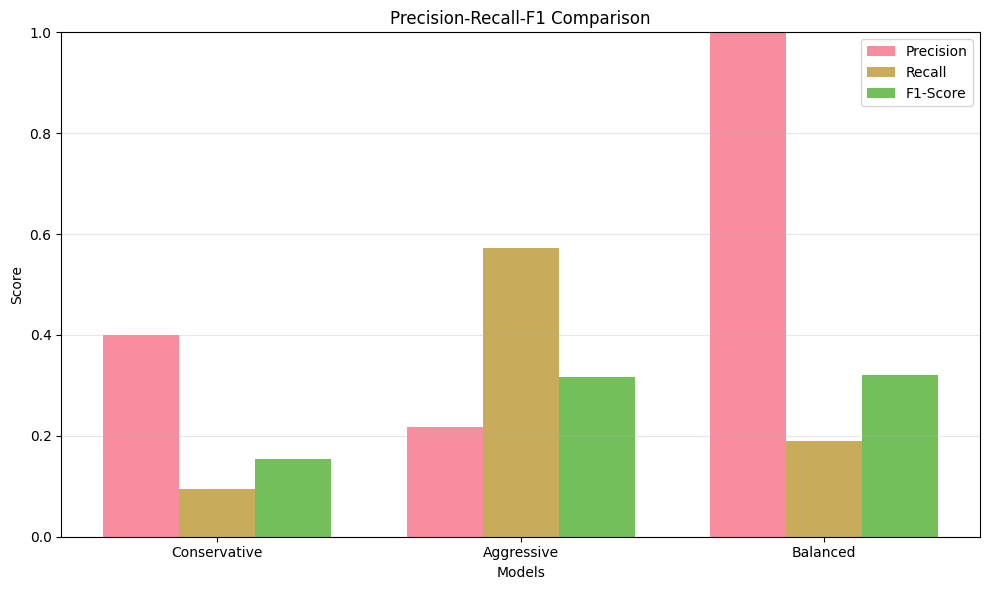


💡 F1-SCORE INSIGHTS:
• F1 punishes models that are good at only precision OR recall
• F1 rewards models that balance both precision and recall
• Use F1 when you can't decide between precision and recall
• Higher F1 = Better overall performance on imbalanced data


In [10]:
# Calculate and compare F1 scores
print("F1-SCORE: Balancing Precision and Recall")
print("=" * 40)

# Create comparison table
results = []

for name, predictions in models:
    precision = precision_score(y_test, predictions, zero_division=0)
    recall = recall_score(y_test, predictions, zero_division=0)
    f1 = f1_score(y_test, predictions, zero_division=0)
    
    results.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })
    
    print(f"\n{name} Model:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    
    if precision > 0 and recall > 0:
        manual_f1 = 2 * (precision * recall) / (precision + recall)
        print(f"  Manual calculation: 2 × ({precision:.3f} × {recall:.3f}) / ({precision:.3f} + {recall:.3f}) = {manual_f1:.3f}")

# Create comparison DataFrame
df_results = pd.DataFrame(results)
print("\n📊 COMPARISON TABLE:")
print(df_results.round(3))

# Visualize the tradeoff
plt.figure(figsize=(10, 6))
x = np.arange(len(results))
width = 0.25

plt.bar(x - width, df_results['Precision'], width, label='Precision', alpha=0.8)
plt.bar(x, df_results['Recall'], width, label='Recall', alpha=0.8)
plt.bar(x + width, df_results['F1-Score'], width, label='F1-Score', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision-Recall-F1 Comparison')
plt.xticks(x, df_results['Model'])
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 F1-SCORE INSIGHTS:")
print("• F1 punishes models that are good at only precision OR recall")
print("• F1 rewards models that balance both precision and recall")
print("• Use F1 when you can't decide between precision and recall")
print("• Higher F1 = Better overall performance on imbalanced data")

### 1.6 Classification Report: Everything in One Place

**What it is:** A comprehensive summary of all classification metrics
**Includes:** Precision, Recall, F1-score for each class, plus averages

**Types of Averages:**
- **Macro avg**: Simple average across classes (treats all classes equally)
- **Weighted avg**: Weighted by class frequency (accounts for imbalance)
- **Support**: Number of samples in each class

**How to read it:**
- Look at individual class performance first
- Check if performance is balanced across classes
- Use weighted average for overall performance on imbalanced data

In [11]:
# Generate classification reports
print("CLASSIFICATION REPORTS: Complete Performance Summary")
print("=" * 55)

class_names = ['Not Spam', 'Spam']

for name, predictions in models:
    print(f"\n{name} Model:")
    print("-" * (len(name) + 7))
    report = classification_report(y_test, predictions, target_names=class_names)
    print(report)

print("\n📖 HOW TO READ CLASSIFICATION REPORTS:")
print("\n🎯 Individual Class Performance:")
print("• Look at 'Spam' row - this is what we care about most")
print("• Precision: Of emails marked spam, how many were actually spam?")
print("• Recall: Of actual spam emails, how many did we catch?")
print("• F1-score: Balance of precision and recall for spam detection")
print("• Support: Number of actual spam emails in test set")

print("\n📊 Average Performance:")
print("• Macro avg: Simple average (treats spam and not-spam equally)")
print("• Weighted avg: Accounts for class imbalance (more realistic)")
print("• Use weighted avg for overall performance on imbalanced data")

print("\n💡 BUSINESS INTERPRETATION:")
print("• Conservative: High precision, low recall → Few false alarms, misses spam")
print("• Aggressive: Low precision, high recall → Catches spam, many false alarms")
print("• Balanced: Moderate both → Best overall F1-score")

CLASSIFICATION REPORTS: Complete Performance Summary

Conservative Model:
-------------------
              precision    recall  f1-score   support

    Not Spam       0.90      0.98      0.94       179
        Spam       0.40      0.10      0.15        21

    accuracy                           0.89       200
   macro avg       0.65      0.54      0.55       200
weighted avg       0.85      0.89      0.86       200


Aggressive Model:
-----------------
              precision    recall  f1-score   support

    Not Spam       0.94      0.76      0.84       179
        Spam       0.22      0.57      0.32        21

    accuracy                           0.74       200
   macro avg       0.58      0.67      0.58       200
weighted avg       0.86      0.74      0.78       200


Balanced Model:
---------------
              precision    recall  f1-score   support

    Not Spam       0.91      1.00      0.95       179
        Spam       1.00      0.19      0.32        21

    accuracy      

## Part 2: Regression Metrics

Regression is about predicting continuous numbers. Let's explore a realistic business scenario.

**Business Scenario:** House Price Prediction
- **Goal**: Predict house prices based on features
- **Challenge**: Different error types have different business impacts
- **Key Question**: How wrong are we, and does it matter?

**Types of Errors:**
- **Overestimate**: Predict $500K for a $400K house (buyer disappointed)
- **Underestimate**: Predict $300K for a $400K house (seller loses money)

**Why Regression Metrics Matter:**
- **Real Estate**: Wrong prices affect buying/selling decisions
- **Sales Forecasting**: Wrong predictions lead to inventory problems
- **Financial Planning**: Inaccurate models cause budget issues

In [12]:
# Create realistic house price dataset
print("Creating House Price Prediction Dataset")
print("=" * 40)

# Generate synthetic house data
X_reg, y_reg = make_regression(
    n_samples=1000,
    n_features=8,
    n_informative=6,
    noise=0.1,
    random_state=42
)

# Transform to realistic house prices (in thousands)
y_reg = (y_reg - y_reg.min()) / (y_reg.max() - y_reg.min()) * 800 + 200  # $200K to $1M

# Create feature names
feature_names_reg = [
    'square_feet', 'bedrooms', 'bathrooms', 'age',
    'lot_size', 'garage_spaces', 'neighborhood_score', 'school_rating'
]

# Create DataFrame
df_houses = pd.DataFrame(X_reg, columns=feature_names_reg)
df_houses['price'] = y_reg

print(f"Dataset created: {len(df_houses)} houses")
print(f"Price range: ${y_reg.min():.0f}K to ${y_reg.max():.0f}K")
print(f"Average price: ${y_reg.mean():.0f}K")
print(f"Price std: ${y_reg.std():.0f}K")

# Split the data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"\nTrain set: {len(X_train_reg)} houses")
print(f"Test set: {len(X_test_reg)} houses")

Creating House Price Prediction Dataset
Dataset created: 1000 houses
Price range: $200K to $1000K
Average price: $548K
Price std: $122K

Train set: 800 houses
Test set: 200 houses


In [13]:
# Train different regression models
print("Training Multiple Regression Models")
print("=" * 35)

# Model 1: Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_reg, y_train_reg)
linear_pred = linear_model.predict(X_test_reg)

# Model 2: Random Forest (more complex)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_reg, y_train_reg)
rf_pred = rf_model.predict(X_test_reg)

# Model 3: Intentionally poor model (for comparison)
poor_model = LinearRegression()
# Add noise to make it perform poorly
X_train_noisy = X_train_reg + np.random.normal(0, 0.5, X_train_reg.shape)
poor_model.fit(X_train_noisy, y_train_reg)
poor_pred = poor_model.predict(X_test_reg)

regression_models = [
    ("Linear Regression", linear_pred),
    ("Random Forest", rf_pred),
    ("Poor Model", poor_pred)
]

print("✅ Three models trained:")
print("  1. Linear Regression: Simple, interpretable")
print("  2. Random Forest: Complex, potentially more accurate")
print("  3. Poor Model: Intentionally bad for comparison")
print("\nNow let's see how different metrics evaluate them...")

Training Multiple Regression Models
✅ Three models trained:
  1. Linear Regression: Simple, interpretable
  2. Random Forest: Complex, potentially more accurate
  3. Poor Model: Intentionally bad for comparison

Now let's see how different metrics evaluate them...


### 2.1 Mean Absolute Error (MAE): Average Prediction Error

**What it is:** Average absolute difference between predicted and actual values
**Formula:** (1/n) × Σ|actual - predicted|
**Units:** Same as your target variable (dollars, in our case)

**Key Properties:**
- Easy to interpret: "On average, we're off by $X"
- Treats all errors equally (no matter how big)
- Robust to outliers
- Always positive

**Business Interpretation:**
- MAE of $50K means: "On average, our price predictions are off by $50,000"
- Lower MAE = Better model
- Compare MAE to typical price range to assess if it's acceptable

In [14]:
# Calculate and explain MAE
print("MEAN ABSOLUTE ERROR (MAE): Average Prediction Error")
print("=" * 52)

print(f"Context: House prices range from ${y_test_reg.min():.0f}K to ${y_test_reg.max():.0f}K")
print(f"Average house price: ${y_test_reg.mean():.0f}K\n")

for name, predictions in regression_models:
    mae = mean_absolute_error(y_test_reg, predictions)
    mae_percentage = (mae / y_test_reg.mean()) * 100
    
    print(f"{name}:")
    print(f"  MAE: ${mae:.0f}K")
    print(f"  As % of avg price: {mae_percentage:.1f}%")
    
    # Show some example errors
    errors = np.abs(y_test_reg - predictions)
    print(f"  Example errors: ${errors[0]:.0f}K, ${errors[1]:.0f}K, ${errors[2]:.0f}K")
    print()

# Manual calculation example
print("📝 MANUAL CALCULATION EXAMPLE (first 5 houses):")
for i in range(5):
    actual = y_test_reg.iloc[i] if hasattr(y_test_reg, 'iloc') else y_test_reg[i]
    predicted = linear_pred[i]
    error = abs(actual - predicted)
    print(f"  House {i+1}: |${actual:.0f}K - ${predicted:.0f}K| = ${error:.0f}K")

manual_mae = np.mean(np.abs(y_test_reg[:5] - linear_pred[:5]))
print(f"  Average of first 5: ${manual_mae:.0f}K")

print("\n💡 MAE INSIGHTS:")
print("• MAE is in the same units as your target (easy to interpret)")
print("• Lower MAE = Better model")
print("• MAE treats $10K error same as $100K error")
print("• Good for when all errors have similar business impact")

MEAN ABSOLUTE ERROR (MAE): Average Prediction Error
Context: House prices range from $238K to $812K
Average house price: $549K

Linear Regression:
  MAE: $0K
  As % of avg price: 0.0%
  Example errors: $0K, $0K, $0K

Random Forest:
  MAE: $32K
  As % of avg price: 5.9%
  Example errors: $6K, $30K, $19K

Poor Model:
  MAE: $23K
  As % of avg price: 4.3%
  Example errors: $37K, $23K, $15K

📝 MANUAL CALCULATION EXAMPLE (first 5 houses):
  House 1: |$720K - $720K| = $0K
  House 2: |$611K - $611K| = $0K
  House 3: |$615K - $615K| = $0K
  House 4: |$342K - $342K| = $0K
  House 5: |$549K - $549K| = $0K
  Average of first 5: $0K

💡 MAE INSIGHTS:
• MAE is in the same units as your target (easy to interpret)
• Lower MAE = Better model
• MAE treats $10K error same as $100K error
• Good for when all errors have similar business impact


### 2.2 Mean Squared Error (MSE): Penalizes Large Errors

**What it is:** Average of squared differences between predicted and actual values
**Formula:** (1/n) × Σ(actual - predicted)²
**Units:** Square of your target variable (dollars², in our case)

**Key Properties:**
- Penalizes large errors more than small ones
- Always positive
- Sensitive to outliers
- Units are squared (harder to interpret directly)

**Why Square the Errors?**
- Makes all errors positive (no cancellation)
- Large errors get disproportionately large penalties
- Mathematical convenience for optimization

**Business Impact:**
- Being off by $100K is 4x worse than being off by $50K (100² vs 50²)
- Use when large errors are much worse than small errors

In [15]:
# Calculate and explain MSE
print("MEAN SQUARED ERROR (MSE): Penalizes Large Errors")
print("=" * 48)

for name, predictions in regression_models:
    mse = mean_squared_error(y_test_reg, predictions)
    mae = mean_absolute_error(y_test_reg, predictions)
    
    print(f"{name}:")
    print(f"  MSE: ${mse:.0f}K² (squared units)")
    print(f"  MAE: ${mae:.0f}K (for comparison)")
    
    # Show how MSE penalizes large errors
    errors = y_test_reg - predictions
    squared_errors = errors ** 2
    print(f"  Largest error: ${abs(errors).max():.0f}K → Squared: ${squared_errors.max():.0f}K²")
    print()

# Demonstrate why MSE penalizes large errors
print("🎯 WHY MSE PENALIZES LARGE ERRORS:")
example_errors = [10, 50, 100]  # In thousands
print("Error Size → Squared Error → Penalty Factor")
for error in example_errors:
    squared = error ** 2
    factor = squared / (example_errors[0] ** 2)
    print(f"  ${error}K → ${squared}K² → {factor:.0f}x penalty")

print("\n💡 MSE INSIGHTS:")
print("• MSE heavily penalizes large errors (good for critical applications)")
print("• Units are squared (harder to interpret than MAE)")
print("• Sensitive to outliers (one huge error can dominate)")
print("• Use when large errors are much worse than small errors")
print("• Common in optimization (easier math for gradient descent)")

MEAN SQUARED ERROR (MSE): Penalizes Large Errors
Linear Regression:
  MSE: $0K² (squared units)
  MAE: $0K (for comparison)
  Largest error: $0K → Squared: $0K²

Random Forest:
  MSE: $1818K² (squared units)
  MAE: $32K (for comparison)
  Largest error: $151K → Squared: $22811K²

Poor Model:
  MSE: $766K² (squared units)
  MAE: $23K (for comparison)
  Largest error: $70K → Squared: $4962K²

🎯 WHY MSE PENALIZES LARGE ERRORS:
Error Size → Squared Error → Penalty Factor
  $10K → $100K² → 1x penalty
  $50K → $2500K² → 25x penalty
  $100K → $10000K² → 100x penalty

💡 MSE INSIGHTS:
• MSE heavily penalizes large errors (good for critical applications)
• Units are squared (harder to interpret than MAE)
• Sensitive to outliers (one huge error can dominate)
• Use when large errors are much worse than small errors
• Common in optimization (easier math for gradient descent)


### 2.3 Root Mean Squared Error (RMSE): MSE in Original Units

**What it is:** Square root of MSE
**Formula:** √[(1/n) × Σ(actual - predicted)²]
**Units:** Same as your target variable (dollars, in our case)

**Key Properties:**
- Combines MSE's large error penalty with MAE's interpretability
- Same units as target variable
- Still sensitive to outliers
- Always ≥ MAE (equality only when all errors are the same size)

**RMSE vs MAE:**
- When RMSE ≈ MAE: Errors are consistent in size
- When RMSE >> MAE: Some errors are much larger than others
- RMSE/MAE ratio tells you about error distribution

**Business Interpretation:**
- RMSE of $60K means: "Typical error is around $60K, with penalty for large errors"
- Compare RMSE to MAE to understand error consistency

ROOT MEAN SQUARED ERROR (RMSE): MSE in Original Units
Linear Regression:
  MAE:  $0K
  RMSE: $0K
  RMSE/MAE ratio: 1.25
  → Some errors are much larger than others

Random Forest:
  MAE:  $32K
  RMSE: $43K
  RMSE/MAE ratio: 1.32
  → Some errors are much larger than others

Poor Model:
  MAE:  $23K
  RMSE: $28K
  RMSE/MAE ratio: 1.19
  → Moderate variation in error sizes

📊 REGRESSION METRICS COMPARISON:
               Model   MAE     MSE  RMSE  RMSE/MAE
0  Linear Regression   0.1     0.0   0.1       1.2
1      Random Forest  32.4  1817.7  42.6       1.3
2         Poor Model  23.4   766.4  27.7       1.2


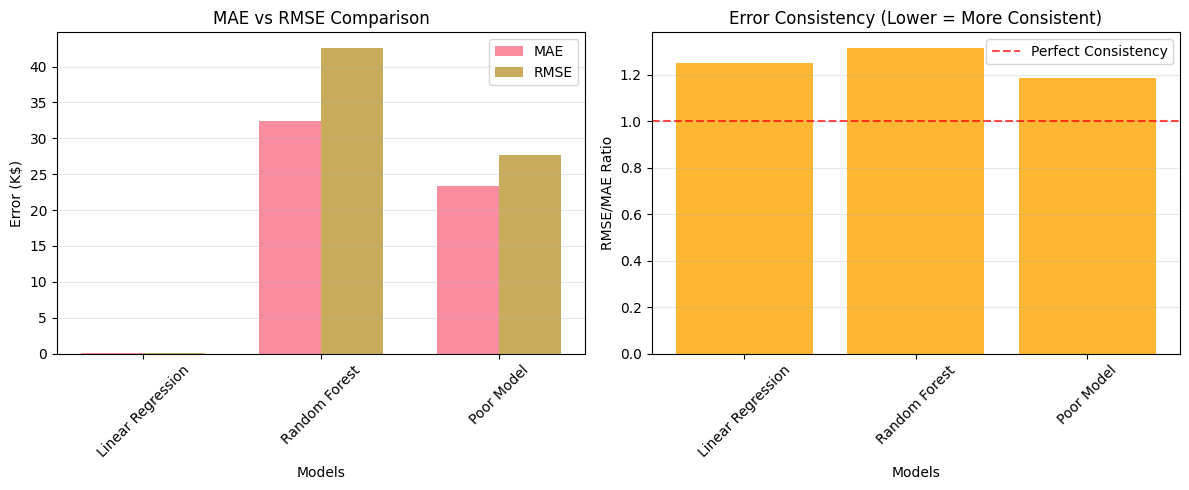


💡 RMSE INSIGHTS:
• RMSE gives you MSE's large-error penalty in interpretable units
• RMSE ≥ MAE always (equal only when all errors are identical)
• RMSE/MAE ratio shows error consistency:
  - Ratio ≈ 1.0: Very consistent errors
  - Ratio > 1.5: Some very large errors (outliers present)
• Use RMSE when you want to penalize large errors but keep interpretability


In [16]:
# Calculate and explain RMSE
print("ROOT MEAN SQUARED ERROR (RMSE): MSE in Original Units")
print("=" * 56)

results_reg = []

for name, predictions in regression_models:
    mae = mean_absolute_error(y_test_reg, predictions)
    mse = mean_squared_error(y_test_reg, predictions)
    rmse = np.sqrt(mse)
    rmse_mae_ratio = rmse / mae if mae > 0 else 0
    
    results_reg.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'RMSE/MAE': rmse_mae_ratio
    })
    
    print(f"{name}:")
    print(f"  MAE:  ${mae:.0f}K")
    print(f"  RMSE: ${rmse:.0f}K")
    print(f"  RMSE/MAE ratio: {rmse_mae_ratio:.2f}")
    
    if rmse_mae_ratio > 1.2:
        print(f"  → Some errors are much larger than others")
    elif rmse_mae_ratio < 1.1:
        print(f"  → Errors are fairly consistent in size")
    else:
        print(f"  → Moderate variation in error sizes")
    print()

# Create comparison DataFrame
df_reg_results = pd.DataFrame(results_reg)
print("📊 REGRESSION METRICS COMPARISON:")
print(df_reg_results.round(1))

# Visualize the comparison
plt.figure(figsize=(12, 5))

# Plot 1: MAE vs RMSE
plt.subplot(1, 2, 1)
x = np.arange(len(results_reg))
width = 0.35
plt.bar(x - width/2, df_reg_results['MAE'], width, label='MAE', alpha=0.8)
plt.bar(x + width/2, df_reg_results['RMSE'], width, label='RMSE', alpha=0.8)
plt.xlabel('Models')
plt.ylabel('Error (K$)')
plt.title('MAE vs RMSE Comparison')
plt.xticks(x, df_reg_results['Model'], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot 2: RMSE/MAE ratio
plt.subplot(1, 2, 2)
plt.bar(x, df_reg_results['RMSE/MAE'], alpha=0.8, color='orange')
plt.xlabel('Models')
plt.ylabel('RMSE/MAE Ratio')
plt.title('Error Consistency (Lower = More Consistent)')
plt.xticks(x, df_reg_results['Model'], rotation=45)
plt.axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Perfect Consistency')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 RMSE INSIGHTS:")
print("• RMSE gives you MSE's large-error penalty in interpretable units")
print("• RMSE ≥ MAE always (equal only when all errors are identical)")
print("• RMSE/MAE ratio shows error consistency:")
print("  - Ratio ≈ 1.0: Very consistent errors")
print("  - Ratio > 1.5: Some very large errors (outliers present)")
print("• Use RMSE when you want to penalize large errors but keep interpretability")

### 2.4 R² Score (Coefficient of Determination): Explained Variance

**What it is:** Proportion of variance in the target variable explained by the model
**Formula:** 1 - (SS_res / SS_tot)
- SS_res = Σ(actual - predicted)² (residual sum of squares)
- SS_tot = Σ(actual - mean)² (total sum of squares)

**Range:** -∞ to 1
- **1.0**: Perfect predictions (explains all variance)
- **0.0**: No better than predicting the mean
- **Negative**: Worse than predicting the mean

**Key Properties:**
- Unitless (can compare across different problems)
- Higher is better
- Not affected by scale of target variable
- Can be negative for very poor models

**Business Interpretation:**
- R² = 0.85 means: "Our model explains 85% of the variation in house prices"
- R² = 0.0 means: "Our model is no better than just guessing the average price"
- R² < 0 means: "Our model is worse than guessing the average price"

R² SCORE: How Much Variance Does Our Model Explain?
Context: House price variance = $16301K²
Baseline (always predict mean): R² = 0.000

Linear Regression:
  R² Score: 1.000
  → Excellent! Explains 100.0% of price variation
  Manual calc: 1 - (1 / 3260176) = 1.000

Random Forest:
  R² Score: 0.888
  → Good! Explains 88.8% of price variation
  Manual calc: 1 - (363544 / 3260176) = 0.888

Poor Model:
  R² Score: 0.953
  → Excellent! Explains 95.3% of price variation
  Manual calc: 1 - (153282 / 3260176) = 0.953



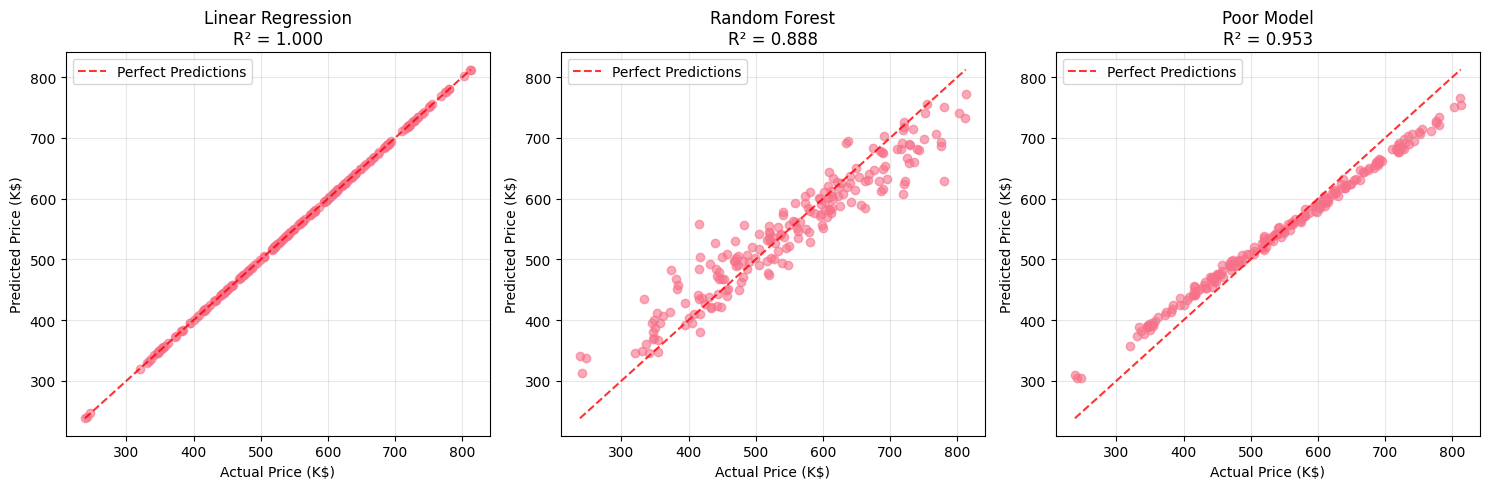

💡 R² INSIGHTS:
• R² = 1.0: Perfect model (all points on red line)
• R² = 0.0: No better than guessing the average
• R² < 0.0: Worse than guessing the average (very bad!)
• R² is unitless - can compare models across different problems
• Higher R² = tighter clustering around the red line

🎯 BUSINESS INTERPRETATION:
• R² = 0.85: 'Our model captures 85% of what drives house prices'
• R² = 0.50: 'Our model captures half of the price variation'
• R² = 0.10: 'Our model barely beats random guessing'


In [17]:
# Calculate and explain R² score
print("R² SCORE: How Much Variance Does Our Model Explain?")
print("=" * 54)

# Calculate baseline (always predict mean)
mean_prediction = np.full_like(y_test_reg, y_test_reg.mean())
baseline_r2 = r2_score(y_test_reg, mean_prediction)

print(f"Context: House price variance = ${y_test_reg.var():.0f}K²")
print(f"Baseline (always predict mean): R² = {baseline_r2:.3f}\n")

for name, predictions in regression_models:
    r2 = r2_score(y_test_reg, predictions)
    
    print(f"{name}:")
    print(f"  R² Score: {r2:.3f}")
    
    if r2 > 0.9:
        print(f"  → Excellent! Explains {r2:.1%} of price variation")
    elif r2 > 0.7:
        print(f"  → Good! Explains {r2:.1%} of price variation")
    elif r2 > 0.5:
        print(f"  → Moderate. Explains {r2:.1%} of price variation")
    elif r2 > 0:
        print(f"  → Poor. Only explains {r2:.1%} of price variation")
    else:
        print(f"  → Terrible! Worse than predicting the mean")
    
    # Manual calculation
    ss_res = np.sum((y_test_reg - predictions) ** 2)
    ss_tot = np.sum((y_test_reg - y_test_reg.mean()) ** 2)
    manual_r2 = 1 - (ss_res / ss_tot)
    print(f"  Manual calc: 1 - ({ss_res:.0f} / {ss_tot:.0f}) = {manual_r2:.3f}")
    print()

# Visualize R² concept
plt.figure(figsize=(15, 5))

for idx, (name, predictions) in enumerate(regression_models):
    plt.subplot(1, 3, idx + 1)
    
    # Scatter plot of actual vs predicted
    plt.scatter(y_test_reg, predictions, alpha=0.6)
    
    # Perfect prediction line
    min_val = min(y_test_reg.min(), predictions.min())
    max_val = max(y_test_reg.max(), predictions.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', alpha=0.8, label='Perfect Predictions')
    
    r2 = r2_score(y_test_reg, predictions)
    plt.xlabel('Actual Price (K$)')
    plt.ylabel('Predicted Price (K$)')
    plt.title(f'{name}\nR² = {r2:.3f}')
    plt.legend()
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("💡 R² INSIGHTS:")
print("• R² = 1.0: Perfect model (all points on red line)")
print("• R² = 0.0: No better than guessing the average")
print("• R² < 0.0: Worse than guessing the average (very bad!)")
print("• R² is unitless - can compare models across different problems")
print("• Higher R² = tighter clustering around the red line")
print("\n🎯 BUSINESS INTERPRETATION:")
print("• R² = 0.85: 'Our model captures 85% of what drives house prices'")
print("• R² = 0.50: 'Our model captures half of the price variation'")
print("• R² = 0.10: 'Our model barely beats random guessing'")

## Part 3: Advanced Metrics and Practical Guidance

Now that you understand the basic metrics, let's explore advanced concepts and learn how to choose the right metrics for your specific business problem.

**What We'll Cover:**
- ROC curves and AUC for classification
- Precision-Recall curves for imbalanced data
- Mean Absolute Percentage Error (MAPE) for regression
- How to choose metrics based on business context
- Common metric pitfalls and how to avoid them
- Communicating metrics to stakeholders

### 3.1 ROC Curve and AUC: Threshold-Independent Evaluation

**What is ROC?** Receiver Operating Characteristic curve
**What it shows:** Trade-off between True Positive Rate and False Positive Rate at different thresholds

**Key Components:**
- **True Positive Rate (TPR)**: Same as Recall = TP / (TP + FN)
- **False Positive Rate (FPR)**: FP / (FP + TN)
- **AUC**: Area Under the Curve (0 to 1)

**AUC Interpretation:**
- **1.0**: Perfect classifier
- **0.5**: Random guessing (no better than coin flip)
- **0.0**: Perfect, but predictions are inverted

**When to use ROC-AUC:**
- Balanced datasets
- When you care about ranking/probability scores
- When false positive and false negative costs are similar

**When NOT to use ROC-AUC:**
- Highly imbalanced datasets (can be misleading)
- When false positives and false negatives have very different costs

ROC CURVES: Threshold-Independent Model Evaluation


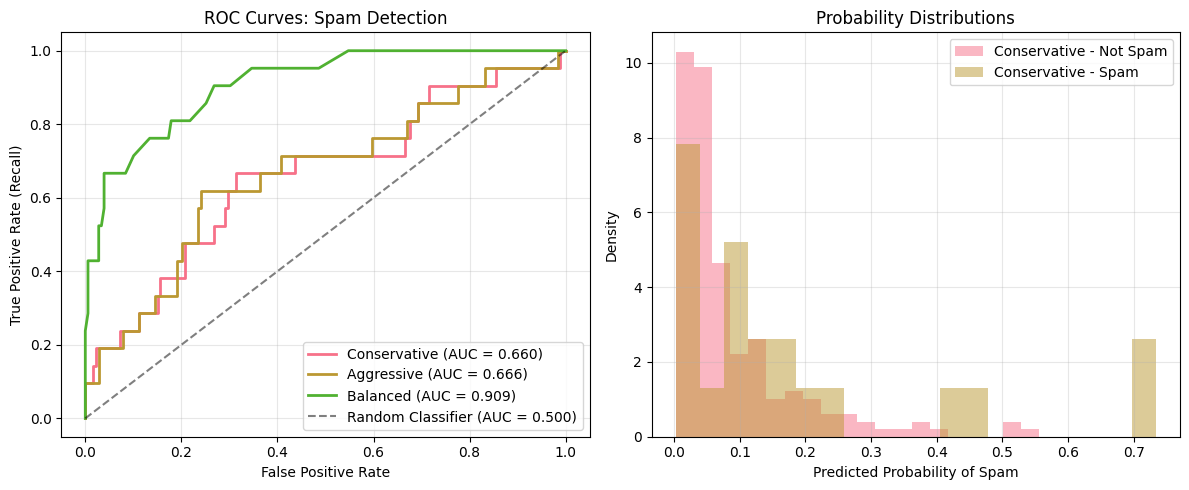


AUC SCORES:
Conservative: 0.660
             → Poor discrimination
Aggressive  : 0.666
             → Poor discrimination
Balanced    : 0.909
             → Excellent discrimination

💡 ROC-AUC INSIGHTS:
• AUC measures how well the model separates classes
• Higher AUC = better at ranking spam vs not-spam
• AUC is threshold-independent (considers all possible thresholds)
• Good for comparing models when you don't know the best threshold

⚠️  ROC-AUC LIMITATIONS:
• Can be overly optimistic on imbalanced data
• Doesn't directly tell you about precision
• May not reflect business costs of different error types


In [18]:
# Create ROC curves for our spam detection models
print("ROC CURVES: Threshold-Independent Model Evaluation")
print("=" * 52)

# Get probability predictions instead of binary predictions
conservative_proba = conservative_model.predict_proba(X_test)[:, 1]
aggressive_proba = aggressive_model.predict_proba(X_test)[:, 1]
balanced_proba = balanced_model.predict_proba(X_test)[:, 1]

models_proba = [
    ("Conservative", conservative_proba),
    ("Aggressive", aggressive_proba),
    ("Balanced", balanced_proba)
]

plt.figure(figsize=(12, 5))

# Plot ROC curves
plt.subplot(1, 2, 1)
for name, probabilities in models_proba:
    fpr, tpr, _ = roc_curve(y_test, probabilities)
    auc = roc_auc_score(y_test, probabilities)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})', linewidth=2)

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier (AUC = 0.500)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curves: Spam Detection')
plt.legend()
plt.grid(alpha=0.3)

# Plot probability distributions
plt.subplot(1, 2, 2)
for name, probabilities in models_proba:
    # Separate probabilities by actual class
    spam_probs = probabilities[y_test == 1]
    not_spam_probs = probabilities[y_test == 0]
    
    plt.hist(not_spam_probs, bins=20, alpha=0.5, label=f'{name} - Not Spam', density=True)
    plt.hist(spam_probs, bins=20, alpha=0.5, label=f'{name} - Spam', density=True)
    break  # Just show one model for clarity

plt.xlabel('Predicted Probability of Spam')
plt.ylabel('Density')
plt.title('Probability Distributions')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate and display AUC scores
print("\nAUC SCORES:")
for name, probabilities in models_proba:
    auc = roc_auc_score(y_test, probabilities)
    print(f"{name:12}: {auc:.3f}")
    
    if auc > 0.9:
        print(f"             → Excellent discrimination")
    elif auc > 0.8:
        print(f"             → Good discrimination")
    elif auc > 0.7:
        print(f"             → Fair discrimination")
    elif auc > 0.6:
        print(f"             → Poor discrimination")
    else:
        print(f"             → No discrimination (random)")

print("\n💡 ROC-AUC INSIGHTS:")
print("• AUC measures how well the model separates classes")
print("• Higher AUC = better at ranking spam vs not-spam")
print("• AUC is threshold-independent (considers all possible thresholds)")
print("• Good for comparing models when you don't know the best threshold")
print("\n⚠️  ROC-AUC LIMITATIONS:")
print("• Can be overly optimistic on imbalanced data")
print("• Doesn't directly tell you about precision")
print("• May not reflect business costs of different error types")

### 3.2 Precision-Recall Curve: Better for Imbalanced Data

**What it shows:** Trade-off between Precision and Recall at different thresholds
**Why it's better for imbalanced data:** Focuses on the minority class (spam)

**Key Differences from ROC:**
- ROC uses False Positive Rate (affected by large number of negatives)
- PR uses Precision (only affected by positive predictions)
- PR curves are more sensitive to class imbalance

**When to use PR curves:**
- Imbalanced datasets (like our spam example)
- When you care more about the minority class
- When precision is important (avoiding false alarms)

**Baseline for PR curves:**
- Random classifier: Precision = % of positive class
- In our case: 10% spam → Random precision = 0.10

PRECISION-RECALL CURVES: Better for Imbalanced Data


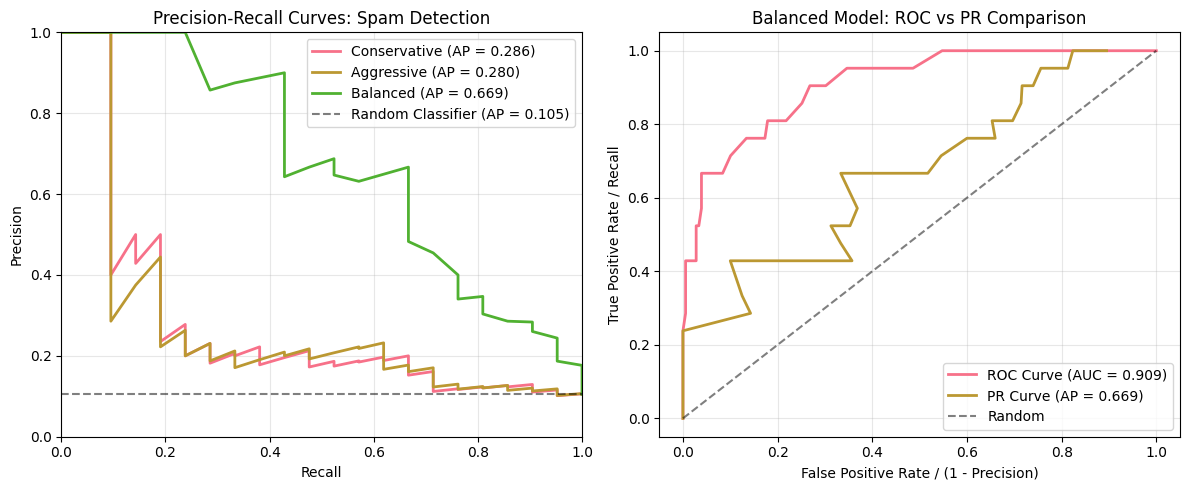


AVERAGE PRECISION SCORES:
Conservative: 0.286 (2.7x better than random)
Aggressive  : 0.280 (2.7x better than random)
Balanced    : 0.669 (6.4x better than random)

Random baseline: 0.105 (% of spam in dataset)

💡 PRECISION-RECALL INSIGHTS:
• PR curves focus on the minority class (spam)
• More sensitive to class imbalance than ROC curves
• Average Precision (AP) = area under PR curve
• Higher AP = better at identifying spam with good precision

🎯 WHEN TO USE WHICH:
• Balanced data + care about both classes → ROC-AUC
• Imbalanced data + care about minority class → PR-AUC
• Our spam example: PR curves are more informative!


In [19]:
# Create Precision-Recall curves
print("PRECISION-RECALL CURVES: Better for Imbalanced Data")
print("=" * 54)

plt.figure(figsize=(12, 5))

# Plot PR curves
plt.subplot(1, 2, 1)
baseline_precision = (y_test == 1).mean()  # Random classifier baseline

for name, probabilities in models_proba:
    precision, recall, _ = precision_recall_curve(y_test, probabilities)
    # Calculate average precision (area under PR curve)
    from sklearn.metrics import average_precision_score
    avg_precision = average_precision_score(y_test, probabilities)
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.3f})', linewidth=2)

# Plot random classifier baseline
plt.axhline(y=baseline_precision, color='k', linestyle='--', alpha=0.5, 
           label=f'Random Classifier (AP = {baseline_precision:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves: Spam Detection')
plt.legend()
plt.grid(alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])

# Compare ROC vs PR for the same model
plt.subplot(1, 2, 2)
name, probabilities = models_proba[2]  # Use balanced model

# ROC curve
fpr, tpr, _ = roc_curve(y_test, probabilities)
auc_roc = roc_auc_score(y_test, probabilities)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_roc:.3f})', linewidth=2)

# PR curve (scaled to [0,1] for comparison)
precision, recall, _ = precision_recall_curve(y_test, probabilities)
avg_precision = average_precision_score(y_test, probabilities)
plt.plot(1-precision, recall, label=f'PR Curve (AP = {avg_precision:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random')
plt.xlabel('False Positive Rate / (1 - Precision)')
plt.ylabel('True Positive Rate / Recall')
plt.title(f'{name} Model: ROC vs PR Comparison')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAVERAGE PRECISION SCORES:")
for name, probabilities in models_proba:
    avg_precision = average_precision_score(y_test, probabilities)
    improvement = avg_precision / baseline_precision
    print(f"{name:12}: {avg_precision:.3f} ({improvement:.1f}x better than random)")

print(f"\nRandom baseline: {baseline_precision:.3f} (% of spam in dataset)")

print("\n💡 PRECISION-RECALL INSIGHTS:")
print("• PR curves focus on the minority class (spam)")
print("• More sensitive to class imbalance than ROC curves")
print("• Average Precision (AP) = area under PR curve")
print("• Higher AP = better at identifying spam with good precision")
print("\n🎯 WHEN TO USE WHICH:")
print("• Balanced data + care about both classes → ROC-AUC")
print("• Imbalanced data + care about minority class → PR-AUC")
print("• Our spam example: PR curves are more informative!")

### 3.3 Mean Absolute Percentage Error (MAPE): Relative Error

**What it is:** Average absolute percentage error between predicted and actual values
**Formula:** (100/n) × Σ|actual - predicted| / |actual|
**Units:** Percentage (%)

**Key Properties:**
- Scale-independent (can compare across different problems)
- Easy to interpret: "On average, we're off by X%"
- Sensitive to values close to zero (division by small numbers)
- Asymmetric (overestimation and underestimation treated differently)

**When to use MAPE:**
- When relative error matters more than absolute error
- Comparing models across different scales
- Business contexts where percentage error is meaningful

**MAPE Limitations:**
- Undefined when actual values are zero
- Biased toward underestimation
- Can be misleading with small actual values

In [20]:
# Calculate and explain MAPE
print("MEAN ABSOLUTE PERCENTAGE ERROR (MAPE): Relative Error")
print("=" * 56)

# Calculate MAPE for all regression models
print("MAPE COMPARISON:")
for name, predictions in regression_models:
    # Use sklearn's MAPE (available in newer versions)
    try:
        mape = mean_absolute_percentage_error(y_test_reg, predictions) * 100
    except:
        # Manual calculation if sklearn version doesn't have MAPE
        mape = np.mean(np.abs((y_test_reg - predictions) / y_test_reg)) * 100
    
    mae = mean_absolute_error(y_test_reg, predictions)
    
    print(f"\n{name}:")
    print(f"  MAPE: {mape:.1f}%")
    print(f"  MAE:  ${mae:.0f}K (for comparison)")
    
    if mape < 5:
        print(f"  → Excellent! Very accurate predictions")
    elif mape < 10:
        print(f"  → Good! Reasonable accuracy")
    elif mape < 20:
        print(f"  → Fair. Some significant errors")
    else:
        print(f"  → Poor. Large relative errors")

# Demonstrate MAPE calculation
print("\n📝 MANUAL MAPE CALCULATION (first 5 houses):")
total_percentage_error = 0
for i in range(5):
    actual = y_test_reg.iloc[i] if hasattr(y_test_reg, 'iloc') else y_test_reg[i]
    predicted = linear_pred[i]
    percentage_error = abs((actual - predicted) / actual) * 100
    total_percentage_error += percentage_error
    print(f"  House {i+1}: |${actual:.0f}K - ${predicted:.0f}K| / ${actual:.0f}K × 100 = {percentage_error:.1f}%")

manual_mape = total_percentage_error / 5
print(f"  Average of first 5: {manual_mape:.1f}%")

# Show MAPE vs MAE for different price ranges
print("\n🎯 MAPE vs MAE: Why Relative Error Matters")
example_cases = [
    (200, 220, "Low-priced house"),
    (500, 520, "Mid-priced house"),
    (800, 820, "High-priced house")
]

print("Scenario                 | MAE    | MAPE")
print("-" * 40)
for actual, predicted, description in example_cases:
    mae = abs(actual - predicted)
    mape = abs((actual - predicted) / actual) * 100
    print(f"{description:20} | ${mae:2.0f}K   | {mape:.1f}%")

print("\n💡 MAPE INSIGHTS:")
print("• Same $20K error has different relative impact:")
print("  - 10% error on $200K house vs 2.5% error on $800K house")
print("• MAPE helps compare models across different price ranges")
print("• Use MAPE when percentage accuracy matters to business")
print("\n⚠️  MAPE LIMITATIONS:")
print("• Undefined when actual values are zero")
print("• Biased toward underestimation (asymmetric)")
print("• Can be misleading with very small actual values")
print("• 10% overestimate ≠ 10% underestimate in terms of MAPE")

MEAN ABSOLUTE PERCENTAGE ERROR (MAPE): Relative Error
MAPE COMPARISON:

Linear Regression:
  MAPE: 0.0%
  MAE:  $0K (for comparison)
  → Excellent! Very accurate predictions

Random Forest:
  MAPE: 6.4%
  MAE:  $32K (for comparison)
  → Good! Reasonable accuracy

Poor Model:
  MAPE: 4.7%
  MAE:  $23K (for comparison)
  → Excellent! Very accurate predictions

📝 MANUAL MAPE CALCULATION (first 5 houses):
  House 1: |$720K - $720K| / $720K × 100 = 0.0%
  House 2: |$611K - $611K| / $611K × 100 = 0.0%
  House 3: |$615K - $615K| / $615K × 100 = 0.0%
  House 4: |$342K - $342K| / $342K × 100 = 0.0%
  House 5: |$549K - $549K| / $549K × 100 = 0.0%
  Average of first 5: 0.0%

🎯 MAPE vs MAE: Why Relative Error Matters
Scenario                 | MAE    | MAPE
----------------------------------------
Low-priced house     | $20K   | 10.0%
Mid-priced house     | $20K   | 4.0%
High-priced house    | $20K   | 2.5%

💡 MAPE INSIGHTS:
• Same $20K error has different relative impact:
  - 10% error on $200K h

## More Important Metrics

While the metrics we've covered so far are essential, there are several other important metrics that are particularly useful in specific scenarios. These metrics address gaps in the standard toolkit and provide better alternatives in certain situations.

**What We'll Cover:**
- **Matthews Correlation Coefficient (MCC)**: Better than F1-score for imbalanced data
- **Log Loss (Cross-Entropy)**: Essential for probability predictions
- **Cohen's Kappa**: Measures agreement beyond chance
- **F-Beta Score**: Generalized F1-score with custom precision/recall weighting
- **Median Absolute Error (MedAE)**: Robust regression metric resistant to outliers

**Why These Matter:**
- MCC provides a balanced metric that works well even with severe class imbalance
- Log Loss is the standard for evaluating probability predictions
- These metrics fill important gaps in the standard evaluation toolkit

### Matthews Correlation Coefficient (MCC): The Balanced Metric

**What it is:** A balanced metric that considers all four confusion matrix values (TP, TN, FP, FN)
**Formula:** MCC = (TP × TN - FP × FN) / √((TP+FP)(TP+FN)(TN+FP)(TN+FN))
**Range:** -1 to +1
- **+1**: Perfect positive correlation (perfect predictions)
- **0**: No correlation (random predictions)
- **-1**: Perfect negative correlation (perfectly wrong predictions)

**Why MCC is Better Than F1:**
- **F1 problem**: Only considers TP, FP, FN (ignores TN)
- **MCC solution**: Considers all four confusion matrix values
- **Result**: More balanced, especially for imbalanced data
- **Property**: MCC = 0 even when accuracy is high (on imbalanced data)

**When to Use MCC:**
- ✅ Imbalanced datasets (better than F1)
- ✅ When you want a single balanced metric
- ✅ When both classes are important
- ✅ Binary classification problems

**Key Insight:** MCC is often called the "balanced F1-score" because it accounts for all confusion matrix values, not just the positive class.

MATTHEWS CORRELATION COEFFICIENT (MCC): The Balanced Metric

Dataset: 200 test samples, 10.5% spam

MCC COMPARISON:

Conservative Model:
  MCC:      0.154
  F1-Score: 0.154
  Accuracy:  0.890
  Confusion Matrix: TP=2, TN=176, FP=3, FN=19
  Manual calc: (2×176 - 3×19) / √((2+3)(2+19)(176+3)(176+19)) = 0.154
  → Weak positive correlation

Aggressive Model:
  MCC:      0.227
  F1-Score: 0.316
  Accuracy:  0.740
  Confusion Matrix: TP=12, TN=136, FP=43, FN=9
  Manual calc: (12×136 - 43×9) / √((12+43)(12+9)(136+43)(136+9)) = 0.227
  → Weak positive correlation

Balanced Model:
  MCC:      0.417
  F1-Score: 0.320
  Accuracy:  0.915
  Confusion Matrix: TP=4, TN=179, FP=0, FN=17
  Manual calc: (4×179 - 0×17) / √((4+0)(4+17)(179+0)(179+17)) = 0.417
  → Moderate positive correlation

MCC vs F1-SCORE COMPARISON:
       Model   MCC  F1-Score  Accuracy
Conservative 0.154     0.154     0.890
  Aggressive 0.227     0.316     0.740
    Balanced 0.417     0.320     0.915


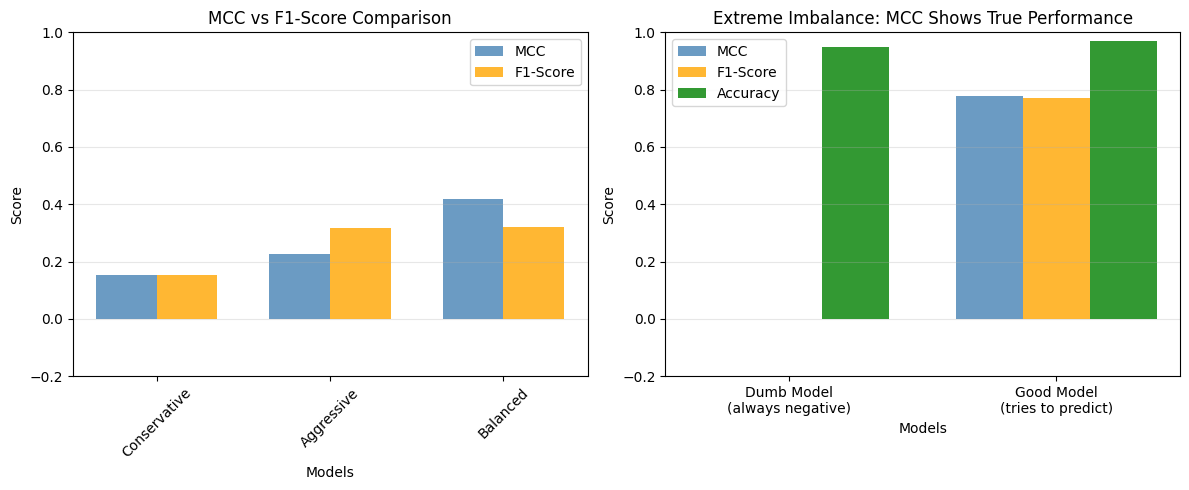


💡 MCC INSIGHTS:
• MCC considers all confusion matrix values (TP, TN, FP, FN)
• F1 only considers TP, FP, FN (ignores TN)
• MCC = 0 for random predictions, even with high accuracy on imbalanced data
• MCC is better than F1 for imbalanced datasets
• MCC range: -1 (perfectly wrong) to +1 (perfectly right)
• Use MCC when you want a single balanced metric for binary classification


In [21]:
# Demonstrate Matthews Correlation Coefficient (MCC)
print("MATTHEWS CORRELATION COEFFICIENT (MCC): The Balanced Metric")
print("=" * 65)

from sklearn.metrics import matthews_corrcoef

# Use our spam detection models
print(f"\nDataset: {len(y_test)} test samples, {(y_test == 1).mean():.1%} spam")

models_mcc = [
    ("Conservative", conservative_pred),
    ("Aggressive", aggressive_pred),
    ("Balanced", balanced_pred)
]

print("\n" + "="*65)
print("MCC COMPARISON:")
print("="*65)

results_mcc = []

for name, predictions in models_mcc:
    mcc = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, zero_division=0)
    acc = accuracy_score(y_test, predictions)
    cm = confusion_matrix(y_test, predictions)
    tn, fp, fn, tp = cm.ravel()
    
    results_mcc.append({
        'Model': name,
        'MCC': mcc,
        'F1-Score': f1,
        'Accuracy': acc
    })
    
    print(f"\n{name} Model:")
    print(f"  MCC:      {mcc:.3f}")
    print(f"  F1-Score: {f1:.3f}")
    print(f"  Accuracy:  {acc:.3f}")
    
    # Manual calculation
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    manual_mcc = numerator / denominator if denominator > 0 else 0
    
    print(f"  Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")
    print(f"  Manual calc: ({tp}×{tn} - {fp}×{fn}) / √(({tp}+{fp})({tp}+{fn})({tn}+{fp})({tn}+{fn})) = {manual_mcc:.3f}")
    
    # Interpretation
    if mcc > 0.5:
        print(f"  → Strong positive correlation (good model)")
    elif mcc > 0.3:
        print(f"  → Moderate positive correlation")
    elif mcc > 0:
        print(f"  → Weak positive correlation")
    elif mcc == 0:
        print(f"  → No correlation (random-like performance)")
    else:
        print(f"  → Negative correlation (worse than random)")

# Compare MCC vs F1
df_mcc = pd.DataFrame(results_mcc)
print("\n" + "="*65)
print("MCC vs F1-SCORE COMPARISON:")
print("="*65)
print(df_mcc.round(3).to_string(index=False))

# Visualize comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x = np.arange(len(df_mcc))
width = 0.35
plt.bar(x - width/2, df_mcc['MCC'], width, label='MCC', alpha=0.8, color='steelblue')
plt.bar(x + width/2, df_mcc['F1-Score'], width, label='F1-Score', alpha=0.8, color='orange')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('MCC vs F1-Score Comparison')
plt.xticks(x, df_mcc['Model'], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim([-0.2, 1])

# Show why MCC is better for imbalanced data
plt.subplot(1, 2, 2)
# Create a scenario with extreme imbalance
y_extreme_imbalanced = np.array([0] * 950 + [1] * 50)  # 5% positive
y_pred_dumb = np.array([0] * 1000)  # Always predict negative
y_pred_good = np.array([0] * 920 + [1] * 80)  # Actually tries

mcc_dumb = matthews_corrcoef(y_extreme_imbalanced, y_pred_dumb)
f1_dumb = f1_score(y_extreme_imbalanced, y_pred_dumb, zero_division=0)
acc_dumb = accuracy_score(y_extreme_imbalanced, y_pred_dumb)

mcc_good = matthews_corrcoef(y_extreme_imbalanced, y_pred_good)
f1_good = f1_score(y_extreme_imbalanced, y_pred_good, zero_division=0)
acc_good = accuracy_score(y_extreme_imbalanced, y_pred_good)

comparison = ['Dumb Model\n(always negative)', 'Good Model\n(tries to predict)']
mcc_values = [mcc_dumb, mcc_good]
f1_values = [f1_dumb, f1_good]
acc_values = [acc_dumb, acc_good]

x2 = np.arange(len(comparison))
plt.bar(x2 - 0.25, mcc_values, 0.25, label='MCC', alpha=0.8, color='steelblue')
plt.bar(x2, f1_values, 0.25, label='F1-Score', alpha=0.8, color='orange')
plt.bar(x2 + 0.25, acc_values, 0.25, label='Accuracy', alpha=0.8, color='green')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Extreme Imbalance: MCC Shows True Performance')
plt.xticks(x2, comparison)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim([-0.2, 1])

plt.tight_layout()
plt.show()

print("\n💡 MCC INSIGHTS:")
print("• MCC considers all confusion matrix values (TP, TN, FP, FN)")
print("• F1 only considers TP, FP, FN (ignores TN)")
print("• MCC = 0 for random predictions, even with high accuracy on imbalanced data")
print("• MCC is better than F1 for imbalanced datasets")
print("• MCC range: -1 (perfectly wrong) to +1 (perfectly right)")
print("• Use MCC when you want a single balanced metric for binary classification")

### Log Loss (Cross-Entropy Loss): Evaluating Probability Predictions

**What it is:** Measures the quality of probability predictions, not just binary classifications
**Formula:** Log Loss = -1/n × Σ[y×log(ŷ) + (1-y)×log(1-ŷ)]
**Range:** 0 to ∞ (lower is better)
- **0**: Perfect predictions (confident and correct)
- **Higher values**: Worse predictions

**Why Log Loss Matters:**
- **Problem**: Accuracy, Precision, Recall only evaluate binary predictions
- **Solution**: Log Loss evaluates the quality of probability estimates
- **Benefit**: Penalizes confident wrong predictions heavily
- **Use Case**: When you need probability scores, not just classifications

**Key Properties:**
- Penalizes confident wrong predictions more than uncertain wrong predictions
- Encourages well-calibrated probabilities
- Standard metric for probability-based models
- Used in many Kaggle competitions

**When to Use Log Loss:**
- ✅ Evaluating probability predictions (not just binary)
- ✅ Model calibration assessment
- ✅ When confidence matters (e.g., medical diagnosis)
- ✅ Comparing models that output probabilities
- ❌ Not suitable for binary predictions only (use accuracy/precision/recall)

LOG LOSS (CROSS-ENTROPY LOSS): Evaluating Probability Predictions

LOG LOSS COMPARISON:

Conservative Model:
  Log Loss:  0.334 (lower is better)
  Accuracy:  0.890
  F1-Score:  0.154
  Example probabilities for first 5 samples:
    Sample 1: Actual=0, Prob=0.114, Pred=0
    Sample 2: Actual=0, Prob=0.158, Pred=0
    Sample 3: Actual=0, Prob=0.040, Pred=0
    Sample 4: Actual=0, Prob=0.053, Pred=0
    Sample 5: Actual=0, Prob=0.013, Pred=0

Aggressive Model:
  Log Loss:  0.581 (lower is better)
  Accuracy:  0.740
  F1-Score:  0.316
  Example probabilities for first 5 samples:
    Sample 1: Actual=0, Prob=0.521, Pred=1
    Sample 2: Actual=0, Prob=0.676, Pred=1
    Sample 3: Actual=0, Prob=0.185, Pred=0
    Sample 4: Actual=0, Prob=0.204, Pred=0
    Sample 5: Actual=0, Prob=0.055, Pred=0

Balanced Model:
  Log Loss:  0.209 (lower is better)
  Accuracy:  0.915
  F1-Score:  0.320
  Example probabilities for first 5 samples:
    Sample 1: Actual=0, Prob=0.240, Pred=0
    Sample 2: Actual=0

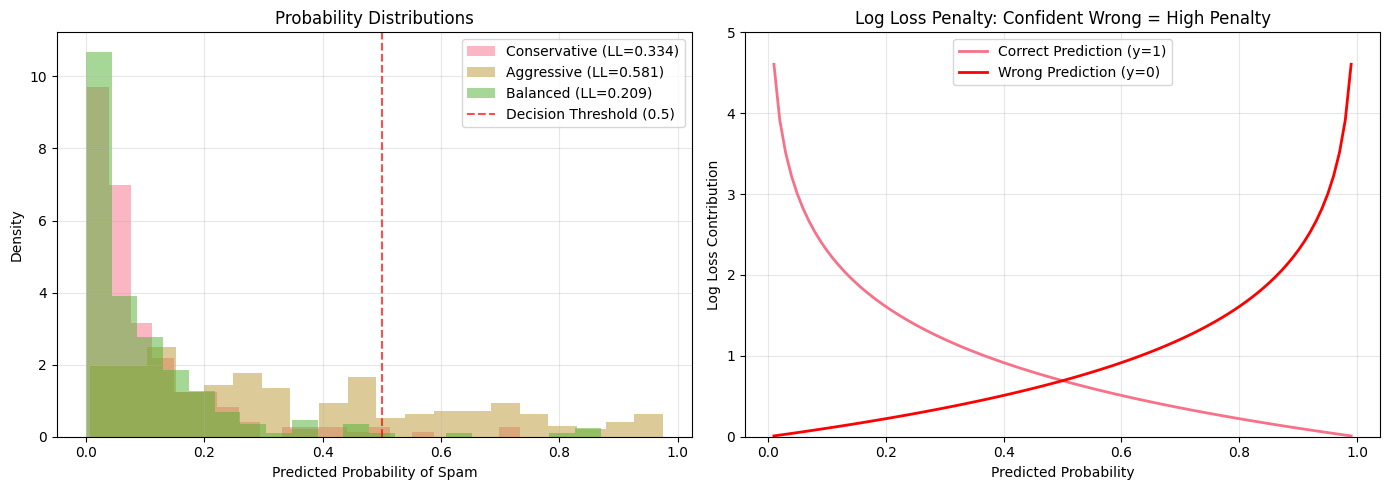


MODEL COMPARISON:
       Model  Log Loss  Accuracy  F1-Score
Conservative     0.334     0.890     0.154
  Aggressive     0.581     0.740     0.316
    Balanced     0.209     0.915     0.320

💡 LOG LOSS INSIGHTS:
• Log Loss evaluates probability quality, not just binary predictions
• Confident wrong predictions are heavily penalized
• Lower log loss = better calibrated probabilities
• Perfect log loss = 0 (confident and correct)
• Log loss is the standard metric for probability-based models
• Use log loss when you need probability scores, not just classifications

⚠️  IMPORTANT:
• Log loss requires probability predictions (not binary)
• Use log_loss(y_true, y_pred_proba) not log_loss(y_true, y_pred_binary)
• Log loss is undefined for probabilities of exactly 0 or 1 (use clipping)


In [22]:
# Demonstrate Log Loss (Cross-Entropy Loss)
print("LOG LOSS (CROSS-ENTROPY LOSS): Evaluating Probability Predictions")
print("=" * 68)

from sklearn.metrics import log_loss

# Get probability predictions from our models
conservative_proba = conservative_model.predict_proba(X_test)[:, 1]
aggressive_proba = aggressive_model.predict_proba(X_test)[:, 1]
balanced_proba = balanced_model.predict_proba(X_test)[:, 1]

models_proba_logloss = [
    ("Conservative", conservative_proba),
    ("Aggressive", aggressive_proba),
    ("Balanced", balanced_proba)
]

print("\n" + "="*68)
print("LOG LOSS COMPARISON:")
print("="*68)

results_logloss = []

for name, probabilities in models_proba_logloss:
    ll = log_loss(y_test, probabilities)
    
    # Also get binary predictions for comparison
    binary_pred = (probabilities > 0.5).astype(int)
    acc = accuracy_score(y_test, binary_pred)
    f1 = f1_score(y_test, binary_pred, zero_division=0)
    
    results_logloss.append({
        'Model': name,
        'Log Loss': ll,
        'Accuracy': acc,
        'F1-Score': f1
    })
    
    print(f"\n{name} Model:")
    print(f"  Log Loss:  {ll:.3f} (lower is better)")
    print(f"  Accuracy:  {acc:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    
    # Show example predictions
    print(f"  Example probabilities for first 5 samples:")
    for i in range(min(5, len(probabilities))):
        actual = y_test.iloc[i] if hasattr(y_test, 'iloc') else y_test[i]
        prob = probabilities[i]
        pred = 1 if prob > 0.5 else 0
        print(f"    Sample {i+1}: Actual={actual}, Prob={prob:.3f}, Pred={pred}")

# Manual calculation example
print("\n" + "="*68)
print("MANUAL LOG LOSS CALCULATION (first 5 samples):")
print("="*68)

y_sample = y_test[:5] if hasattr(y_test, 'iloc') else y_test[:5]
proba_sample = balanced_proba[:5]

total_loss = 0
for i in range(len(y_sample)):
    y_true = y_sample.iloc[i] if hasattr(y_sample, 'iloc') else y_sample[i]
    y_pred_prob = proba_sample[i]
    
    # Avoid log(0) by clipping probabilities
    y_pred_prob = np.clip(y_pred_prob, 1e-15, 1 - 1e-15)
    
    loss = -(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
    total_loss += loss
    
    print(f"  Sample {i+1}: y={y_true}, ŷ={y_pred_prob:.3f}")
    print(f"    Loss = -[{y_true}×log({y_pred_prob:.3f}) + {1-y_true}×log({1-y_pred_prob:.3f})] = {loss:.3f}")

manual_logloss = total_loss / len(y_sample)
print(f"\n  Average Log Loss: {manual_logloss:.3f}")

# Visualize log loss concept
plt.figure(figsize=(14, 5))

# Plot 1: Probability distributions
plt.subplot(1, 2, 1)
for name, probabilities in models_proba_logloss:
    ll = log_loss(y_test, probabilities)
    plt.hist(probabilities, bins=20, alpha=0.5, label=f'{name} (LL={ll:.3f})', density=True)

plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='Decision Threshold (0.5)')
plt.xlabel('Predicted Probability of Spam')
plt.ylabel('Density')
plt.title('Probability Distributions')
plt.legend()
plt.grid(alpha=0.3)

# Plot 2: Log Loss for different confidence levels
plt.subplot(1, 2, 2)
# Show how log loss penalizes confident wrong predictions
prob_range = np.linspace(0.01, 0.99, 100)
logloss_correct = -np.log(prob_range)  # When y=1 and prediction is prob_range
logloss_wrong = -np.log(1 - prob_range)  # When y=0 but prediction is prob_range

plt.plot(prob_range, logloss_correct, label='Correct Prediction (y=1)', linewidth=2)
plt.plot(prob_range, logloss_wrong, label='Wrong Prediction (y=0)', linewidth=2, color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Log Loss Contribution')
plt.title('Log Loss Penalty: Confident Wrong = High Penalty')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim([0, 5])

plt.tight_layout()
plt.show()

# Compare models
df_logloss = pd.DataFrame(results_logloss)
print("\n" + "="*68)
print("MODEL COMPARISON:")
print("="*68)
print(df_logloss.round(3).to_string(index=False))

print("\n💡 LOG LOSS INSIGHTS:")
print("• Log Loss evaluates probability quality, not just binary predictions")
print("• Confident wrong predictions are heavily penalized")
print("• Lower log loss = better calibrated probabilities")
print("• Perfect log loss = 0 (confident and correct)")
print("• Log loss is the standard metric for probability-based models")
print("• Use log loss when you need probability scores, not just classifications")
print("\n⚠️  IMPORTANT:")
print("• Log loss requires probability predictions (not binary)")
print("• Use log_loss(y_true, y_pred_proba) not log_loss(y_true, y_pred_binary)")
print("• Log loss is undefined for probabilities of exactly 0 or 1 (use clipping)")

### Cohen's Kappa: Agreement Beyond Chance

**What it is:** Measures agreement between predictions and actual values, accounting for chance agreement
**Formula:** κ = (p₀ - pₑ) / (1 - pₑ)
- **p₀**: Observed agreement (accuracy)
- **pₑ**: Expected agreement by chance

**Range:** -1 to +1 (but typically 0 to +1)
- **+1**: Perfect agreement
- **0**: Agreement no better than chance
- **Negative**: Agreement worse than chance

**Why Kappa Matters:**
- **Problem**: Accuracy can be high even with random predictions (on imbalanced data)
- **Solution**: Kappa accounts for chance agreement
- **Benefit**: More meaningful than accuracy for imbalanced or multi-class problems

**Interpretation Guidelines:**
- **κ > 0.75**: Excellent agreement
- **κ 0.40-0.75**: Fair to good agreement
- **κ < 0.40**: Poor agreement

**When to Use Kappa:**
- ✅ Multi-class classification
- ✅ Imbalanced datasets
- ✅ Comparing model to human annotators
- ✅ When chance agreement is high

COHEN'S KAPPA: Agreement Beyond Chance

BINARY CLASSIFICATION EXAMPLE:

Conservative Model:
  Accuracy: 0.890
  Kappa:    0.118
  → Poor agreement

Aggressive Model:
  Accuracy: 0.740
  Kappa:    0.193
  → Poor agreement

Balanced Model:
  Accuracy: 0.915
  Kappa:    0.296
  → Poor agreement

MULTI-CLASS CLASSIFICATION EXAMPLE:

Multi-Class Model:
  Accuracy: 0.720
  Kappa:    0.517

MANUAL KAPPA CALCULATION (Binary Example):

Confusion Matrix:
  TP=4, TN=179, FP=0, FN=17

Observed Agreement (p₀): (4 + 179) / 200 = 0.915
Expected Agreement by Chance (pₑ):
  = (4+0)/200 × (4+17)/200 + (179+17)/200 × (179+0)/200
  = 0.020 × 0.105 + 0.980 × 0.895
  = 0.879

Kappa (κ): (0.915 - 0.879) / (1 - 0.879) = 0.296


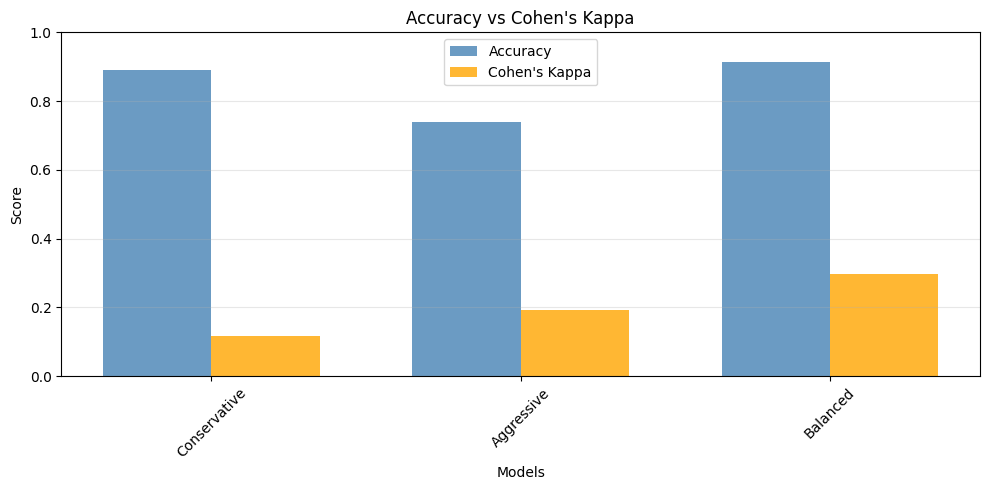


💡 COHEN'S KAPPA INSIGHTS:
• Kappa accounts for chance agreement (unlike accuracy)
• Kappa = 0 means agreement no better than chance
• Useful for imbalanced and multi-class problems
• Better than accuracy when chance agreement is high
• Interpretation: κ > 0.75 (excellent), 0.40-0.75 (fair-good), < 0.40 (poor)


In [23]:
# Demonstrate Cohen's Kappa
print("COHEN'S KAPPA: Agreement Beyond Chance")
print("=" * 45)

from sklearn.metrics import cohen_kappa_score

# Binary classification example
print("\nBINARY CLASSIFICATION EXAMPLE:")
print("=" * 45)

for name, predictions in models_mcc:
    kappa = cohen_kappa_score(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    
    print(f"\n{name} Model:")
    print(f"  Accuracy: {acc:.3f}")
    print(f"  Kappa:    {kappa:.3f}")
    
    # Interpretation
    if kappa > 0.75:
        interpretation = "Excellent agreement"
    elif kappa > 0.40:
        interpretation = "Fair to good agreement"
    elif kappa > 0:
        interpretation = "Poor agreement"
    else:
        interpretation = "Worse than chance"
    
    print(f"  → {interpretation}")

# Multi-class example
print("\n" + "="*45)
print("MULTI-CLASS CLASSIFICATION EXAMPLE:")
print("="*45)

# Create multi-class dataset
X_multi_kappa, y_multi_kappa = make_classification(
    n_samples=500,
    n_features=10,
    n_classes=3,
    n_informative=8,
    weights=[0.5, 0.3, 0.2],  # Imbalanced
    random_state=42
)

X_train_kappa, X_test_kappa, y_train_kappa, y_test_kappa = train_test_split(
    X_multi_kappa, y_multi_kappa, test_size=0.2, random_state=42, stratify=y_multi_kappa
)

# Train model
model_multi_kappa = RandomForestClassifier(n_estimators=50, random_state=42)
model_multi_kappa.fit(X_train_kappa, y_train_kappa)
pred_multi_kappa = model_multi_kappa.predict(X_test_kappa)

acc_multi = accuracy_score(y_test_kappa, pred_multi_kappa)
kappa_multi = cohen_kappa_score(y_test_kappa, pred_multi_kappa)

print(f"\nMulti-Class Model:")
print(f"  Accuracy: {acc_multi:.3f}")
print(f"  Kappa:    {kappa_multi:.3f}")

# Manual calculation for binary case
print("\n" + "="*45)
print("MANUAL KAPPA CALCULATION (Binary Example):")
print("="*45)

# Use balanced model predictions
cm_kappa = confusion_matrix(y_test, balanced_pred)
tn, fp, fn, tp = cm_kappa.ravel()
n = len(y_test)

# Observed agreement (accuracy)
p0 = (tp + tn) / n

# Expected agreement by chance
# For binary: p_e = (TP+FP)/n × (TP+FN)/n + (TN+FN)/n × (TN+FP)/n
pe = ((tp + fp) / n) * ((tp + fn) / n) + ((tn + fn) / n) * ((tn + fp) / n)

# Kappa
kappa_manual = (p0 - pe) / (1 - pe) if pe < 1 else 0

print(f"\nConfusion Matrix:")
print(f"  TP={tp}, TN={tn}, FP={fp}, FN={fn}")
print(f"\nObserved Agreement (p₀): ({tp} + {tn}) / {n} = {p0:.3f}")
print(f"Expected Agreement by Chance (pₑ):")
print(f"  = ({tp}+{fp})/{n} × ({tp}+{fn})/{n} + ({tn}+{fn})/{n} × ({tn}+{fp})/{n}")
print(f"  = {((tp + fp) / n):.3f} × {((tp + fn) / n):.3f} + {((tn + fn) / n):.3f} × {((tn + fp) / n):.3f}")
print(f"  = {pe:.3f}")
print(f"\nKappa (κ): ({p0:.3f} - {pe:.3f}) / (1 - {pe:.3f}) = {kappa_manual:.3f}")

# Visualize kappa vs accuracy
plt.figure(figsize=(10, 5))

# Compare models
model_names = [name for name, _ in models_mcc]
accuracies = [accuracy_score(y_test, pred) for _, pred in models_mcc]
kappas = [cohen_kappa_score(y_test, pred) for _, pred in models_mcc]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8, color='steelblue')
plt.bar(x + width/2, kappas, width, label="Cohen's Kappa", alpha=0.8, color='orange')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title("Accuracy vs Cohen's Kappa")
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n💡 COHEN'S KAPPA INSIGHTS:")
print("• Kappa accounts for chance agreement (unlike accuracy)")
print("• Kappa = 0 means agreement no better than chance")
print("• Useful for imbalanced and multi-class problems")
print("• Better than accuracy when chance agreement is high")
print("• Interpretation: κ > 0.75 (excellent), 0.40-0.75 (fair-good), < 0.40 (poor)")

### F-Beta Score: Generalized F1-Score

**What it is:** Generalization of F1-score that allows weighting precision vs recall
**Formula:** Fβ = (1+β²) × (Precision × Recall) / (β²×Precision + Recall)
**Range:** 0 to 1 (higher is better)

**Special Cases:**
- **F0.5**: Emphasizes precision (β < 1)
- **F1**: Equal weight (β = 1) - standard F1-score
- **F2**: Emphasizes recall (β > 1)

**Why F-Beta Matters:**
- **Problem**: F1-score treats precision and recall equally
- **Solution**: F-Beta allows custom weighting based on business needs
- **Benefit**: Optimize for what matters most in your specific problem

**When to Use F-Beta:**
- ✅ When precision and recall have different importance
- ✅ Need to optimize for specific business goals
- ✅ Want to tune the precision-recall tradeoff
- ✅ F0.5: Precision more important (e.g., spam detection)
- ✅ F2: Recall more important (e.g., medical diagnosis)

F-BETA SCORE: Generalized F1-Score

F-BETA COMPARISON:

Conservative Model:
  Precision: 0.400
  Recall:    0.095
  F0.5:      0.244 (emphasizes precision)
  F1:        0.154 (balanced)
  F2:        0.112 (emphasizes recall)

Aggressive Model:
  Precision: 0.218
  Recall:    0.571
  F0.5:      0.249 (emphasizes precision)
  F1:        0.316 (balanced)
  F2:        0.432 (emphasizes recall)

Balanced Model:
  Precision: 1.000
  Recall:    0.190
  F0.5:      0.541 (emphasizes precision)
  F1:        0.320 (balanced)
  F2:        0.227 (emphasizes recall)

MANUAL F-BETA CALCULATION:

F0.5 (Precision) (β=0.5):
  Formula: (1+0.5²) × (1.000 × 0.190) / (0.5²×1.000 + 0.190)
  = 0.238 / 0.440 = 0.541

F1 (Balanced) (β=1.0):
  Formula: (1+1.0²) × (1.000 × 0.190) / (1.0²×1.000 + 0.190)
  = 0.381 / 1.190 = 0.320

F2 (Recall) (β=2.0):
  Formula: (1+2.0²) × (1.000 × 0.190) / (2.0²×1.000 + 0.190)
  = 0.952 / 4.190 = 0.227


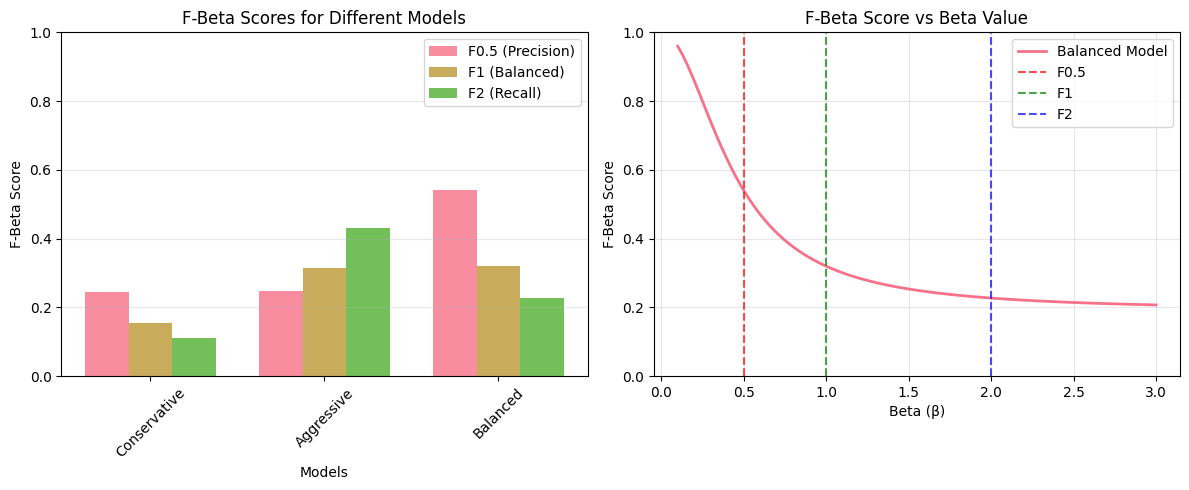


💡 F-BETA INSIGHTS:
• F-Beta generalizes F1-score with custom precision/recall weighting
• β < 1: Emphasizes precision (F0.5)
• β = 1: Equal weight (F1-score)
• β > 1: Emphasizes recall (F2)
• Use F0.5 when precision is more important (e.g., spam detection)
• Use F2 when recall is more important (e.g., medical diagnosis)
• F-Beta allows fine-tuning based on business priorities


In [24]:
# Demonstrate F-Beta Score
print("F-BETA SCORE: Generalized F1-Score")
print("=" * 40)

from sklearn.metrics import fbeta_score

# Calculate F-Beta for different beta values
betas = [0.5, 1.0, 2.0]
beta_names = ['F0.5 (Precision)', 'F1 (Balanced)', 'F2 (Recall)']

print("\n" + "="*40)
print("F-BETA COMPARISON:")
print("="*40)

results_fbeta = []

for name, predictions in models_mcc:
    precision = precision_score(y_test, predictions, zero_division=0)
    recall = recall_score(y_test, predictions, zero_division=0)
    f1 = f1_score(y_test, predictions, zero_division=0)
    
    fbeta_scores = []
    for beta in betas:
        fbeta = fbeta_score(y_test, predictions, beta=beta, zero_division=0)
        fbeta_scores.append(fbeta)
    
    results_fbeta.append({
        'Model': name,
        'Precision': precision,
        'Recall': recall,
        'F0.5': fbeta_scores[0],
        'F1': fbeta_scores[1],
        'F2': fbeta_scores[2]
    })
    
    print(f"\n{name} Model:")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F0.5:      {fbeta_scores[0]:.3f} (emphasizes precision)")
    print(f"  F1:        {fbeta_scores[1]:.3f} (balanced)")
    print(f"  F2:        {fbeta_scores[2]:.3f} (emphasizes recall)")

# Manual calculation example
print("\n" + "="*40)
print("MANUAL F-BETA CALCULATION:")
print("="*40)

# Use balanced model
precision_ex = precision_score(y_test, balanced_pred, zero_division=0)
recall_ex = recall_score(y_test, balanced_pred, zero_division=0)

for beta, beta_name in zip(betas, beta_names):
    numerator = (1 + beta**2) * precision_ex * recall_ex
    denominator = (beta**2 * precision_ex) + recall_ex
    fbeta_manual = numerator / denominator if denominator > 0 else 0
    
    print(f"\n{beta_name} (β={beta}):")
    print(f"  Formula: (1+{beta}²) × ({precision_ex:.3f} × {recall_ex:.3f}) / ({beta}²×{precision_ex:.3f} + {recall_ex:.3f})")
    print(f"  = {numerator:.3f} / {denominator:.3f} = {fbeta_manual:.3f}")

# Visualize F-Beta for different beta values
df_fbeta = pd.DataFrame(results_fbeta)

plt.figure(figsize=(12, 5))

# Plot 1: F-Beta scores for different models
plt.subplot(1, 2, 1)
x = np.arange(len(df_fbeta))
width = 0.25

plt.bar(x - width, df_fbeta['F0.5'], width, label='F0.5 (Precision)', alpha=0.8)
plt.bar(x, df_fbeta['F1'], width, label='F1 (Balanced)', alpha=0.8)
plt.bar(x + width, df_fbeta['F2'], width, label='F2 (Recall)', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('F-Beta Score')
plt.title('F-Beta Scores for Different Models')
plt.xticks(x, df_fbeta['Model'], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.ylim([0, 1])

# Plot 2: F-Beta as function of beta
plt.subplot(1, 2, 2)
beta_range = np.linspace(0.1, 3, 100)
fbeta_curve = []

for beta in beta_range:
    fbeta_val = fbeta_score(y_test, balanced_pred, beta=beta, zero_division=0)
    fbeta_curve.append(fbeta_val)

plt.plot(beta_range, fbeta_curve, linewidth=2, label='Balanced Model')
plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.7, label='F0.5')
plt.axvline(x=1.0, color='green', linestyle='--', alpha=0.7, label='F1')
plt.axvline(x=2.0, color='blue', linestyle='--', alpha=0.7, label='F2')
plt.xlabel('Beta (β)')
plt.ylabel('F-Beta Score')
plt.title('F-Beta Score vs Beta Value')
plt.legend()
plt.grid(alpha=0.3)
plt.ylim([0, 1])

plt.tight_layout()
plt.show()

print("\n💡 F-BETA INSIGHTS:")
print("• F-Beta generalizes F1-score with custom precision/recall weighting")
print("• β < 1: Emphasizes precision (F0.5)")
print("• β = 1: Equal weight (F1-score)")
print("• β > 1: Emphasizes recall (F2)")
print("• Use F0.5 when precision is more important (e.g., spam detection)")
print("• Use F2 when recall is more important (e.g., medical diagnosis)")
print("• F-Beta allows fine-tuning based on business priorities")

### Median Absolute Error (MedAE): Robust Regression Metric

**What it is:** Median of absolute errors - robust to outliers
**Formula:** MedAE = median(|y - ŷ|)
**Units:** Same as target variable

**Why MedAE Matters:**
- **Problem**: MAE and RMSE are sensitive to outliers
- **Solution**: MedAE uses median instead of mean
- **Benefit**: Resistant to extreme values, gives typical error

**Key Properties:**
- Robust to outliers (unlike MAE/RMSE)
- Represents typical error (not average)
- Same units as target variable
- Less sensitive to extreme predictions

**When to Use MedAE:**
- ✅ Data has outliers or extreme values
- ✅ Want typical error, not average error
- ✅ Outliers are not representative of model performance
- ✅ Complement to MAE/RMSE for robustness check

MEDIAN ABSOLUTE ERROR (MedAE): Robust Regression Metric

REGRESSION WITH OUTLIERS:
Dataset: 200 houses
Added 5 outliers (3x actual price)

Linear Regression:
  MAE:      $0K
  MedAE:    $0K
  RMSE:     $0K

  With Outliers:
    MAE:      $28K (changed by $28K)
    MedAE:    $0K (changed by $0K)
    → MedAE is more robust to outliers!

Random Forest:
  MAE:      $32K
  MedAE:    $26K
  RMSE:     $43K

  With Outliers:
    MAE:      $60K (changed by $28K)
    MedAE:    $26K (changed by $0K)
    → MedAE is more robust to outliers!

Poor Model:
  MAE:      $23K
  MedAE:    $23K
  RMSE:     $28K

  With Outliers:
    MAE:      $51K (changed by $28K)
    MedAE:    $24K (changed by $1K)
    → MedAE is more robust to outliers!

MANUAL MEDAE CALCULATION (first 10 houses):

Absolute errors: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sorted errors: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Median: $0K
Mean (MAE): $0K


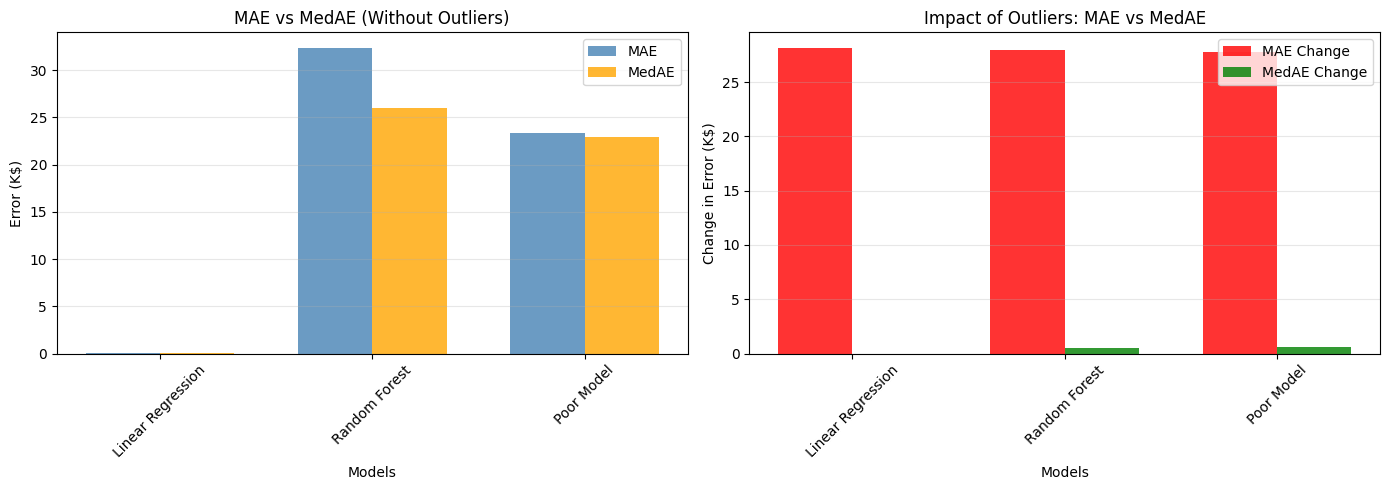

/var/folders/_0/vj0h1w7s5rz2zncs6_jg3bp00000gn/T/ipykernel_80010/1804811823.py:119: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([errors_all], labels=['Errors'])


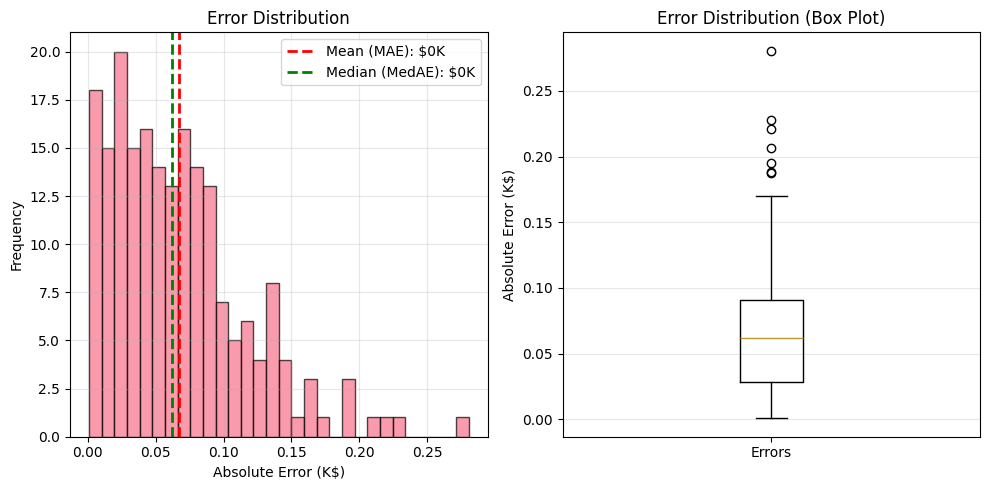


💡 MEDAE INSIGHTS:
• MedAE uses median instead of mean (robust to outliers)
• MedAE represents typical error, not average error
• Less sensitive to extreme values than MAE/RMSE
• Use MedAE when data has outliers or extreme values
• MedAE complements MAE/RMSE for robustness assessment
• MedAE = typical error, MAE = average error

🎯 WHEN TO USE:
• Data has outliers → Use MedAE
• Want typical error → Use MedAE
• Outliers not representative → Use MedAE
• Always report both MAE and MedAE for robustness check


In [25]:
# Demonstrate Median Absolute Error (MedAE)
print("MEDIAN ABSOLUTE ERROR (MedAE): Robust Regression Metric")
print("=" * 60)

from sklearn.metrics import median_absolute_error

# Create dataset with outliers
print("\nREGRESSION WITH OUTLIERS:")
print("=" * 60)

# Use our house price dataset and add some outliers to test set
y_test_with_outliers = y_test_reg.copy()
# Add a few extreme outliers
outlier_indices = np.random.choice(len(y_test_reg), size=5, replace=False)
y_test_with_outliers[outlier_indices] = y_test_reg[outlier_indices] * 3  # 3x the actual price

print(f"Dataset: {len(y_test_reg)} houses")
print(f"Added {len(outlier_indices)} outliers (3x actual price)")

# Calculate MedAE vs MAE
results_medae = []

for name, predictions in regression_models:
    mae = mean_absolute_error(y_test_reg, predictions)
    medae = median_absolute_error(y_test_reg, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_reg, predictions))
    
    # Also calculate with outliers
    mae_outliers = mean_absolute_error(y_test_with_outliers, predictions)
    medae_outliers = median_absolute_error(y_test_with_outliers, predictions)
    
    results_medae.append({
        'Model': name,
        'MAE': mae,
        'MedAE': medae,
        'RMSE': rmse,
        'MAE (with outliers)': mae_outliers,
        'MedAE (with outliers)': medae_outliers
    })
    
    print(f"\n{name}:")
    print(f"  MAE:      ${mae:.0f}K")
    print(f"  MedAE:    ${medae:.0f}K")
    print(f"  RMSE:     ${rmse:.0f}K")
    print(f"\n  With Outliers:")
    print(f"    MAE:      ${mae_outliers:.0f}K (changed by ${mae_outliers-mae:.0f}K)")
    print(f"    MedAE:    ${medae_outliers:.0f}K (changed by ${medae_outliers-medae:.0f}K)")
    print(f"    → MedAE is more robust to outliers!")

# Manual calculation
print("\n" + "="*60)
print("MANUAL MEDAE CALCULATION (first 10 houses):")
print("="*60)

errors_sample = np.abs(y_test_reg[:10] - linear_pred[:10])
print(f"\nAbsolute errors: {errors_sample.round(0)}")
print(f"Sorted errors: {np.sort(errors_sample).round(0)}")
print(f"Median: ${np.median(errors_sample):.0f}K")
print(f"Mean (MAE): ${np.mean(errors_sample):.0f}K")

# Visualize robustness
df_medae = pd.DataFrame(results_medae)

plt.figure(figsize=(14, 5))

# Plot 1: MAE vs MedAE comparison
plt.subplot(1, 2, 1)
x = np.arange(len(df_medae))
width = 0.35

plt.bar(x - width/2, df_medae['MAE'], width, label='MAE', alpha=0.8, color='steelblue')
plt.bar(x + width/2, df_medae['MedAE'], width, label='MedAE', alpha=0.8, color='orange')

plt.xlabel('Models')
plt.ylabel('Error (K$)')
plt.title('MAE vs MedAE (Without Outliers)')
plt.xticks(x, df_medae['Model'], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot 2: Impact of outliers
plt.subplot(1, 2, 2)
mae_change = df_medae['MAE (with outliers)'] - df_medae['MAE']
medae_change = df_medae['MedAE (with outliers)'] - df_medae['MedAE']

x2 = np.arange(len(df_medae))
plt.bar(x2 - width/2, mae_change, width, label='MAE Change', alpha=0.8, color='red')
plt.bar(x2 + width/2, medae_change, width, label='MedAE Change', alpha=0.8, color='green')

plt.xlabel('Models')
plt.ylabel('Change in Error (K$)')
plt.title('Impact of Outliers: MAE vs MedAE')
plt.xticks(x2, df_medae['Model'], rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

# Show error distribution
plt.figure(figsize=(10, 5))

errors_all = np.abs(y_test_reg - linear_pred)
errors_sorted = np.sort(errors_all)

plt.subplot(1, 2, 1)
plt.hist(errors_all, bins=30, alpha=0.7, edgecolor='black')
plt.axvline(x=np.mean(errors_all), color='red', linestyle='--', linewidth=2, label=f'Mean (MAE): ${np.mean(errors_all):.0f}K')
plt.axvline(x=np.median(errors_all), color='green', linestyle='--', linewidth=2, label=f'Median (MedAE): ${np.median(errors_all):.0f}K')
plt.xlabel('Absolute Error (K$)')
plt.ylabel('Frequency')
plt.title('Error Distribution')
plt.legend()
plt.grid(alpha=0.3)

# Box plot comparison
plt.subplot(1, 2, 2)
plt.boxplot([errors_all], labels=['Errors'])
plt.ylabel('Absolute Error (K$)')
plt.title('Error Distribution (Box Plot)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 MEDAE INSIGHTS:")
print("• MedAE uses median instead of mean (robust to outliers)")
print("• MedAE represents typical error, not average error")
print("• Less sensitive to extreme values than MAE/RMSE")
print("• Use MedAE when data has outliers or extreme values")
print("• MedAE complements MAE/RMSE for robustness assessment")
print("• MedAE = typical error, MAE = average error")
print("\n🎯 WHEN TO USE:")
print("• Data has outliers → Use MedAE")
print("• Want typical error → Use MedAE")
print("• Outliers not representative → Use MedAE")
print("• Always report both MAE and MedAE for robustness check")

## Part 4: Choosing the Right Metrics

**The Most Important Question:** What does success look like for your business?

Different business contexts require different metrics. Here's how to choose:

### 4.1 Classification Metric Selection Guide

**Ask yourself these questions:**

1. **Is your dataset balanced?**
   - Balanced → Accuracy, ROC-AUC are fine
   - Imbalanced → Focus on Precision, Recall, F1, PR-AUC

2. **What's the cost of false positives vs false negatives?**
   - FP more costly → Prioritize Precision
   - FN more costly → Prioritize Recall
   - Equal cost → Use F1-score

3. **Do you need probability scores or just classifications?**
   - Probabilities → ROC-AUC, PR-AUC
   - Classifications → Precision, Recall, F1

### 4.2 Regression Metric Selection Guide

**Ask yourself these questions:**

1. **Are large errors much worse than small errors?**
   - Yes → Use RMSE or MSE
   - No → Use MAE

2. **Do you need scale-independent comparison?**
   - Yes → Use R² or MAPE
   - No → MAE, RMSE are fine

3. **Is relative error more important than absolute error?**
   - Yes → Use MAPE
   - No → Use MAE or RMSE

In [26]:
# Create a comprehensive metric selection guide
print("METRIC SELECTION GUIDE: Choose the Right Metrics for Your Problem")
print("=" * 70)

# Classification scenarios
classification_scenarios = [
    {
        'scenario': 'Email Spam Detection',
        'balance': 'Imbalanced (10% spam)',
        'fp_cost': 'High (miss important emails)',
        'fn_cost': 'Medium (annoyed users)',
        'recommended': 'Precision, PR-AUC',
        'avoid': 'Accuracy (misleading)'
    },
    {
        'scenario': 'Medical Diagnosis',
        'balance': 'Imbalanced (rare disease)',
        'fp_cost': 'Medium (unnecessary treatment)',
        'fn_cost': 'Very High (missed diagnosis)',
        'recommended': 'Recall, F1-score',
        'avoid': 'Accuracy, Precision-only'
    },
    {
        'scenario': 'Image Classification',
        'balance': 'Balanced (equal classes)',
        'fp_cost': 'Equal',
        'fn_cost': 'Equal',
        'recommended': 'Accuracy, ROC-AUC',
        'avoid': 'None'
    },
    {
        'scenario': 'Fraud Detection',
        'balance': 'Very Imbalanced (0.1% fraud)',
        'fp_cost': 'High (block legitimate transactions)',
        'fn_cost': 'Very High (financial loss)',
        'recommended': 'F1-score, PR-AUC',
        'avoid': 'Accuracy, ROC-AUC'
    }
]

print("\n📊 CLASSIFICATION SCENARIOS:")
print("=" * 30)
for scenario in classification_scenarios:
    print(f"\n🎯 {scenario['scenario']}:")
    print(f"   Data Balance: {scenario['balance']}")
    print(f"   False Positive Cost: {scenario['fp_cost']}")
    print(f"   False Negative Cost: {scenario['fn_cost']}")
    print(f"   ✅ Recommended: {scenario['recommended']}")
    print(f"   ❌ Avoid: {scenario['avoid']}")

# Regression scenarios
regression_scenarios = [
    {
        'scenario': 'House Price Prediction',
        'large_errors': 'Much worse (buyer/seller decisions)',
        'scale': 'Single scale ($)',
        'relative': 'Important (% of price)',
        'recommended': 'RMSE, MAPE',
        'avoid': 'None'
    },
    {
        'scenario': 'Sales Forecasting',
        'large_errors': 'Much worse (inventory costs)',
        'scale': 'Multiple products',
        'relative': 'Very important (% error)',
        'recommended': 'MAPE, R²',
        'avoid': 'MAE only'
    },
    {
        'scenario': 'Temperature Prediction',
        'large_errors': 'Similar impact',
        'scale': 'Single scale (°F)',
        'relative': 'Not important',
        'recommended': 'MAE, R²',
        'avoid': 'MAPE'
    },
    {
        'scenario': 'Stock Price Prediction',
        'large_errors': 'Much worse (financial risk)',
        'scale': 'Multiple stocks',
        'relative': 'Critical (% returns)',
        'recommended': 'MAPE, RMSE',
        'avoid': 'MAE only'
    }
]

print("\n📈 REGRESSION SCENARIOS:")
print("=" * 25)
for scenario in regression_scenarios:
    print(f"\n🎯 {scenario['scenario']}:")
    print(f"   Large Error Impact: {scenario['large_errors']}")
    print(f"   Scale Consideration: {scenario['scale']}")
    print(f"   Relative Error: {scenario['relative']}")
    print(f"   ✅ Recommended: {scenario['recommended']}")
    print(f"   ❌ Avoid: {scenario['avoid']}")

print("\n\n🎯 QUICK DECISION TREE:")
print("=" * 25)
print("\n📊 CLASSIFICATION:")
print("1. Balanced data + equal error costs → Accuracy, ROC-AUC")
print("2. Imbalanced + avoid false positives → Precision, PR-AUC")
print("3. Imbalanced + avoid false negatives → Recall, F1-score")
print("4. Imbalanced + balance both → F1-score, PR-AUC")

print("\n📈 REGRESSION:")
print("1. Large errors much worse → RMSE, MSE")
print("2. All errors similar → MAE")
print("3. Need scale independence → R², MAPE")
print("4. Relative error matters → MAPE")
print("5. Comparing models → R² (always include)")

METRIC SELECTION GUIDE: Choose the Right Metrics for Your Problem

📊 CLASSIFICATION SCENARIOS:

🎯 Email Spam Detection:
   Data Balance: Imbalanced (10% spam)
   False Positive Cost: High (miss important emails)
   False Negative Cost: Medium (annoyed users)
   ✅ Recommended: Precision, PR-AUC
   ❌ Avoid: Accuracy (misleading)

🎯 Medical Diagnosis:
   Data Balance: Imbalanced (rare disease)
   False Positive Cost: Medium (unnecessary treatment)
   False Negative Cost: Very High (missed diagnosis)
   ✅ Recommended: Recall, F1-score
   ❌ Avoid: Accuracy, Precision-only

🎯 Image Classification:
   Data Balance: Balanced (equal classes)
   False Positive Cost: Equal
   False Negative Cost: Equal
   ✅ Recommended: Accuracy, ROC-AUC
   ❌ Avoid: None

🎯 Fraud Detection:
   Data Balance: Very Imbalanced (0.1% fraud)
   False Positive Cost: High (block legitimate transactions)
   False Negative Cost: Very High (financial loss)
   ✅ Recommended: F1-score, PR-AUC
   ❌ Avoid: Accuracy, ROC-AUC

📈 

## Part 5: Common Pitfalls and How to Avoid Them

Even experienced practitioners make these mistakes. Learn to spot and avoid them:

### 5.1 The Accuracy Trap
**Problem:** Using accuracy on imbalanced data
**Example:** 99% accuracy on fraud detection (but 0% fraud caught)
**Solution:** Always check class distribution first

### 5.2 The Single Metric Fallacy
**Problem:** Relying on just one metric
**Example:** High precision but terrible recall
**Solution:** Always use multiple complementary metrics

### 5.3 The Scale Confusion
**Problem:** Comparing metrics across different scales
**Example:** MAE of $1000 vs MAE of 10 units
**Solution:** Use relative metrics (R², MAPE) for comparison

### 5.4 The Business Disconnect
**Problem:** Optimizing metrics that don't align with business goals
**Example:** Optimizing accuracy when cost of errors is very different
**Solution:** Always connect metrics to business impact

In [27]:
# Demonstrate common pitfalls with examples
print("COMMON METRIC PITFALLS: Learn from These Mistakes")
print("=" * 52)

# Pitfall 1: Accuracy trap
print("\n🚨 PITFALL 1: The Accuracy Trap")
print("=" * 35)

# Create extremely imbalanced dataset
y_extreme = np.array([0] * 990 + [1] * 10)  # 1% positive class
y_pred_lazy = np.array([0] * 1000)  # Always predict negative
y_pred_good = np.array([0] * 980 + [1] * 20)  # Actually tries to find positives

lazy_acc = accuracy_score(y_extreme, y_pred_lazy)
good_acc = accuracy_score(y_extreme, y_pred_good)
lazy_recall = recall_score(y_extreme, y_pred_lazy, zero_division=0)
good_recall = recall_score(y_extreme, y_pred_good, zero_division=0)

print(f"Dataset: 1% positive class (very imbalanced)")
print(f"\nLazy Model (always predicts negative):")
print(f"  Accuracy: {lazy_acc:.1%} ← Looks great!")
print(f"  Recall:   {lazy_recall:.1%} ← Actually terrible!")
print(f"\nGood Model (actually tries):")
print(f"  Accuracy: {good_acc:.1%} ← Looks worse")
print(f"  Recall:   {good_recall:.1%} ← Actually much better!")
print(f"\n💡 Lesson: Accuracy can be misleading on imbalanced data!")

# Pitfall 2: Single metric fallacy
print("\n\n🚨 PITFALL 2: Single Metric Fallacy")
print("=" * 38)

# Create two models with different trade-offs
model_a_pred = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]  # High precision, low recall
model_b_pred = [1, 1, 1, 1, 1, 1, 0, 0, 0, 0]  # Low precision, high recall
true_labels =  [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]  # 4 positives, 6 negatives

a_precision = precision_score(true_labels, model_a_pred)
a_recall = recall_score(true_labels, model_a_pred)
a_f1 = f1_score(true_labels, model_a_pred)

b_precision = precision_score(true_labels, model_b_pred)
b_recall = recall_score(true_labels, model_b_pred)
b_f1 = f1_score(true_labels, model_b_pred)

print(f"Model A: Precision={a_precision:.2f}, Recall={a_recall:.2f}, F1={a_f1:.2f}")
print(f"Model B: Precision={b_precision:.2f}, Recall={b_recall:.2f}, F1={b_f1:.2f}")
print(f"\nIf you only looked at:")
print(f"  Precision → Model A wins ({a_precision:.2f} > {b_precision:.2f})")
print(f"  Recall    → Model B wins ({b_recall:.2f} > {a_recall:.2f})")
print(f"  F1-score  → Model B wins ({b_f1:.2f} > {a_f1:.2f})")
print(f"\n💡 Lesson: Always use multiple metrics to get the full picture!")

# Pitfall 3: Scale confusion
print("\n\n🚨 PITFALL 3: Scale Confusion")
print("=" * 32)

# Compare models on different scales
house_mae = 50  # $50K error on house prices
stock_mae = 5   # $5 error on stock prices
house_avg = 500  # $500K average house price
stock_avg = 100  # $100 average stock price

house_mape = (house_mae / house_avg) * 100
stock_mape = (stock_mae / stock_avg) * 100

print(f"House Price Model: MAE = ${house_mae}K")
print(f"Stock Price Model:  MAE = ${stock_mae}")
print(f"\nWhich is better? Hard to tell from MAE alone!")
print(f"\nUsing relative metrics:")
print(f"House Price Model: MAPE = {house_mape:.1f}%")
print(f"Stock Price Model:  MAPE = {stock_mape:.1f}%")
print(f"\n💡 Lesson: Use relative metrics (MAPE, R²) to compare across scales!")

print("\n\n🎯 HOW TO AVOID THESE PITFALLS:")
print("=" * 35)
print("\n✅ BEST PRACTICES:")
print("1. Always check class distribution before choosing metrics")
print("2. Use multiple complementary metrics (never just one)")
print("3. Include relative metrics when comparing across scales")
print("4. Connect metrics to business impact and costs")
print("5. Visualize results (confusion matrices, curves)")
print("6. Test metrics on edge cases and extreme scenarios")
print("7. Document why you chose specific metrics")

print("\n❌ RED FLAGS:")
print("• Using only accuracy on any real-world problem")
print("• Reporting a single metric without context")
print("• Choosing metrics without considering business costs")
print("• Comparing raw error values across different scales")
print("• Ignoring class imbalance in metric selection")

COMMON METRIC PITFALLS: Learn from These Mistakes

🚨 PITFALL 1: The Accuracy Trap
Dataset: 1% positive class (very imbalanced)

Lazy Model (always predicts negative):
  Accuracy: 99.0% ← Looks great!
  Recall:   0.0% ← Actually terrible!

Good Model (actually tries):
  Accuracy: 99.0% ← Looks worse
  Recall:   100.0% ← Actually much better!

💡 Lesson: Accuracy can be misleading on imbalanced data!


🚨 PITFALL 2: Single Metric Fallacy
Model A: Precision=1.00, Recall=0.50, F1=0.67
Model B: Precision=0.67, Recall=1.00, F1=0.80

If you only looked at:
  Precision → Model A wins (1.00 > 0.67)
  Recall    → Model B wins (1.00 > 0.50)
  F1-score  → Model B wins (0.80 > 0.67)

💡 Lesson: Always use multiple metrics to get the full picture!


🚨 PITFALL 3: Scale Confusion
House Price Model: MAE = $50K
Stock Price Model:  MAE = $5

Which is better? Hard to tell from MAE alone!

Using relative metrics:
House Price Model: MAPE = 10.0%
Stock Price Model:  MAPE = 5.0%

💡 Lesson: Use relative metrics (

## Summary: Your Metrics Toolkit

Congratulations! You now have a comprehensive understanding of ML metrics. Here's your toolkit:

### 📊 Classification Metrics
- **Accuracy**: Overall correctness (use with balanced data)
- **Precision**: "When I predict positive, how often am I right?"
- **Recall**: "Of all positives, how many did I catch?"
- **F1-Score**: Balance of precision and recall
- **Confusion Matrix**: Shows exactly where mistakes happen
- **ROC-AUC**: Threshold-independent ranking (balanced data)
- **PR-AUC**: Better for imbalanced data

### 📈 Regression Metrics
- **MAE**: Average absolute error (easy to interpret)
- **MSE**: Penalizes large errors (squared units)
- **RMSE**: MSE in original units (interpretable + large error penalty)
- **R²**: Proportion of variance explained (0 to 1)
- **MAPE**: Relative error as percentage

### 🎯 Key Takeaways
1. **No single metric tells the whole story** - always use multiple metrics
2. **Business context matters** - connect metrics to real-world impact
3. **Class imbalance changes everything** - accuracy can be misleading
4. **Visualize your results** - confusion matrices and curves reveal insights
5. **Choose metrics before building models** - know what success looks like

### 🚀 Next Steps
- Practice with your own datasets
- Experiment with different metric combinations
- Learn about domain-specific metrics (e.g., medical, financial)
- Explore advanced topics like multi-class and multi-label metrics

**Remember:** The best metric is the one that best captures what matters for your specific problem and business context!